In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#CVS A CARGAR

agosto13 = pd.read_csv('resources/properati-AR-2013-08-01-properties-sell.csv')
septiembre13 = pd.read_csv('resources/properati-AR-2013-09-01-properties-sell.csv')
octubre13 = pd.read_csv('resources/properati-AR-2013-10-01-properties-sell.csv')
noviembre13 = pd.read_csv('resources/properati-AR-2013-11-01-properties-sell.csv')
diciembre13 = pd.read_csv('resources/properati-AR-2013-12-01-properties-sell.csv')
enero14 = pd.read_csv('resources/properati-AR-2014-01-01-properties-sell.csv')
febrero14 = pd.read_csv('resources/properati-AR-2014-02-01-properties-sell.csv')
marzo14 = pd.read_csv('resources/properati-AR-2014-03-01-properties-sell.csv')
abril14 = pd.read_csv('resources/properati-AR-2014-04-01-properties-sell.csv')
mayo14 = pd.read_csv('resources/properati-AR-2014-05-01-properties-sell.csv')
junio14 = pd.read_csv('resources/properati-AR-2014-06-01-properties-sell.csv')
enero15 = pd.read_csv('resources/properati-AR-2015-01-01-properties-sell-six_months.csv')
agosto15 = pd.read_csv('resources/properati-AR-2015-08-01-properties-sell-six_months.csv')
marzo16 = pd.read_csv('resources/properati-AR-2016-03-01-properties-sell-six_months.csv')
abril16 = pd.read_csv('resources/properati-AR-2016-04-01-properties-sell.csv')
mayo16 = pd.read_csv('resources/properati-AR-2016-05-01-properties-sell.csv')
junio16 = pd.read_csv('resources/properati-AR-2016-06-01-properties-sell.csv')
enero17 = pd.read_csv('resources/properati-AR-2017-07-01-properties-sell-six_months.csv')
agosto17 = pd.read_csv('resources/properati-AR-2017-08-01-properties-sell.csv')

datos = pd.concat([agosto13, septiembre13, octubre13, noviembre13, diciembre13, enero14, febrero14, \
                          marzo14, abril14, mayo14, junio14, enero15, agosto15, marzo16, abril16, mayo16, \
                          junio16, enero17, agosto17])

In [3]:
datos.head()

,country_name,created_on,currency,description,expenses,floor,geonames_id,id,image_thumbnail,lat,...,price_per_m2,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title
0,NaN,2012-08-08,NaN,NaN,NaN,NaN,3429308.0,NaN,http://cf-thumbs.properati.com.ar/yELs9sxKz88c...,NaN,...,NaN,NaN,http://www.properati.com.ar/9h_venta_casa_san-...,house,3.0,NaN,NaN,NaN,NaN,NaN
1,NaN,2012-08-08,NaN,NaN,850 aprox,10.0,3436077.0,NaN,http://cf-thumbs.properati.com.ar/1RXv7KDah9Yt...,-34.561208,...,NaN,NaN,http://www.properati.com.ar/ag_venta_departame...,apartment,3.0,NaN,NaN,102.0,NaN,NaN
2,NaN,2012-08-08,NaN,NaN,NaN,11.0,3427467.0,NaN,http://cf-thumbs.properati.com.ar/Mkt0XSfl3IEb...,-34.546730,...,NaN,NaN,http://www.properati.com.ar/ah_venta_departame...,apartment,3.0,NaN,NaN,73.0,NaN,NaN
3,NaN,2012-08-08,NaN,NaN,NaN,NaN,3427467.0,NaN,http://cf-thumbs.properati.com.ar/VBY8U6EZL4ru...,-34.543776,...,NaN,NaN,http://www.properati.com.ar/aj_venta_casa_vill...,house,4.0,NaN,NaN,485.0,NaN,NaN
4,NaN,2012-08-08,USD,NaN,NaN,NaN,3427467.0,NaN,http://cf-thumbs.properati.com.ar/WYxr8Dmu1rzj...,-34.558247,...,NaN,315.186246,http://www.properati.com.ar/ak_venta_casa_vill...,house,4.0,NaN,NaN,349.0,NaN,NaN


In [4]:
#Vistazo general del dataset
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201255 entries, 0 to 187481
Data columns (total 28 columns):
country_name                  481573 non-null object
created_on                    1201255 non-null object
currency                      977787 non-null object
description                   481552 non-null object
expenses                      59368 non-null object
floor                         159008 non-null float64
geonames_id                   1007063 non-null float64
id                            481573 non-null object
image_thumbnail               1149878 non-null object
lat                           997544 non-null float64
lat-lon                       997544 non-null object
lon                           997533 non-null float64
operation                     1201255 non-null object
place_name                    1201188 non-null object
place_with_parent_names       1201255 non-null object
price                         996484 non-null float64
price_aprox_local_currency    

Como primer vistazo, vemos que solo hay 5 campos sin nulos: fecha, operación (siempre venta), descripcion total 
del lugar, url y tipo de propiedad.

# Limpieza y Preparación de Datos

In [5]:
#Elimino columnas innecesarias, por ejemplo aquellas que son relativas al sitio web o el tipo de operación 
#ya que es siempre venta. Por otra parte, nos quedaremos con la url como identificador unívoco de las propiedades
# ya que el campo 'id' tiene muchos nulos.

datos = datos.loc[:,['created_on', 'description', 'floor', 'place_with_parent_names', \
                 'price_aprox_usd', 'price_usd_per_m2', 'property_type', 'rooms', 'surface_in_m2',\
                     'surface_covered_in_m2' , 'surface_total_in_m2', 'properati_url', 'expenses']]

datos.columns = ['fecha', 'descripcion', 'piso', 'lugar', 'precio', \
                    'precio_por_m2', 'tipo_propiedad', 'habitaciones', 'superficie_m2', \
                 'superficie_cubierta_m2', 'superficie_total_m2', 'url', 'expensas']

datos.head()

,fecha,descripcion,piso,lugar,precio,precio_por_m2,tipo_propiedad,habitaciones,superficie_m2,superficie_cubierta_m2,superficie_total_m2,url,expensas
0,2012-08-08,NaN,NaN,|Argentina|Buenos Aires Interior|San Andrés de...,NaN,NaN,house,3.0,NaN,NaN,NaN,http://www.properati.com.ar/9h_venta_casa_san-...,NaN
1,2012-08-08,NaN,10.0,|Argentina|Capital Federal|Belgrano|,NaN,NaN,apartment,3.0,102.0,NaN,NaN,http://www.properati.com.ar/ag_venta_departame...,850 aprox
2,2012-08-08,NaN,11.0,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,NaN,NaN,apartment,3.0,73.0,NaN,NaN,http://www.properati.com.ar/ah_venta_departame...,NaN
3,2012-08-08,NaN,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,NaN,NaN,house,4.0,485.0,NaN,NaN,http://www.properati.com.ar/aj_venta_casa_vill...,NaN
4,2012-08-08,NaN,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,110000.0,315.186246,house,4.0,349.0,NaN,NaN,http://www.properati.com.ar/ak_venta_casa_vill...,NaN


In [6]:
#Separamos el campo 'lugar' en pais, provincia y localidad
def split_place_with_parent_names_barrio(x):
    z=x.split("|")
    return z[4]
def split_place_with_parent_names_localidad(x):
    z=x.split("|")
    return z[3]
def split_place_with_parent_names_provincia(x):
    z=x.split("|")
    return z[2]
def split_place_with_parent_names_pais(x):
    z=x.split("|")
    return z[1]

datos['pais'] = datos['lugar'].map(split_place_with_parent_names_pais)
datos['provincia'] = datos['lugar'].map(split_place_with_parent_names_provincia)
datos['localidad'] = datos['lugar'].map(split_place_with_parent_names_localidad)
#datos['barrio'] = datos['lugar'].map(split_place_with_parent_names_barrio)
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201255 entries, 0 to 187481
Data columns (total 16 columns):
fecha                     1201255 non-null object
descripcion               481552 non-null object
piso                      159008 non-null float64
lugar                     1201255 non-null object
precio                    996484 non-null float64
precio_por_m2             732956 non-null float64
tipo_propiedad            1201255 non-null object
habitaciones              831836 non-null float64
superficie_m2             563808 non-null float64
superficie_cubierta_m2    387986 non-null float64
superficie_total_m2       320821 non-null float64
url                       1201255 non-null object
expensas                  59368 non-null object
pais                      1201255 non-null object
provincia                 1201255 non-null object
localidad                 1201255 non-null object
dtypes: float64(7), object(9)
memory usage: 155.8+ MB


In [7]:
#Verificamos datos: paises
print(datos['pais'].unique())

['Argentina' 'Estados Unidos' 'Uruguay']


In [8]:
#Verificamos datos: provincias
provincias = pd.DataFrame({'nombre_provincia': datos['provincia'].unique()}).sort_values('nombre_provincia', ascending = True)
provincias

,nombre_provincia
2,Bs.As. G.B.A. Zona Norte
3,Bs.As. G.B.A. Zona Oeste
4,Bs.As. G.B.A. Zona Sur
6,Buenos Aires Costa Atlántica
0,Buenos Aires Interior
1,Capital Federal
21,Catamarca
17,Chaco
11,Chubut
18,Corrientes


Por lo que vemos rápidamente, hay ventas de Estados Unidos (New York, Miami, Florida) y de Uruguay (Maldonado, Montevideo, Punta del Este). Por otra parte, vemos que la provincia de Buenos Aires se dividen en varios sectores.

In [9]:
#Filtramos los datos para quedándonos con datos de GBA y capital federal
datos = datos.loc[(datos['pais'].str.contains('Argentina')),:]
datos = datos.loc[(datos['provincia'].str.contains('G.B.A.')| datos['provincia'].str.contains('Capital Federal')),:]
datos.head()

,fecha,descripcion,piso,lugar,precio,precio_por_m2,tipo_propiedad,habitaciones,superficie_m2,superficie_cubierta_m2,superficie_total_m2,url,expensas,pais,provincia,localidad
1,2012-08-08,NaN,10.0,|Argentina|Capital Federal|Belgrano|,NaN,NaN,apartment,3.0,102.0,NaN,NaN,http://www.properati.com.ar/ag_venta_departame...,850 aprox,Argentina,Capital Federal,Belgrano
2,2012-08-08,NaN,11.0,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,NaN,NaN,apartment,3.0,73.0,NaN,NaN,http://www.properati.com.ar/ah_venta_departame...,NaN,Argentina,Bs.As. G.B.A. Zona Norte,General San Martín
3,2012-08-08,NaN,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,NaN,NaN,house,4.0,485.0,NaN,NaN,http://www.properati.com.ar/aj_venta_casa_vill...,NaN,Argentina,Bs.As. G.B.A. Zona Norte,General San Martín
4,2012-08-08,NaN,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,110000.0,315.186246,house,4.0,349.0,NaN,NaN,http://www.properati.com.ar/ak_venta_casa_vill...,NaN,Argentina,Bs.As. G.B.A. Zona Norte,General San Martín
5,2012-08-08,NaN,NaN,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,NaN,NaN,apartment,3.0,NaN,NaN,NaN,http://www.properati.com.ar/ao_venta_departame...,NaN,Argentina,Bs.As. G.B.A. Zona Oeste,Tres de Febrero


In [10]:
#Tenemos que remover todos aquellos datos que no tienen precio, puesto que no aportan al análisis. 
datos = datos.loc[datos['precio'].notnull(),:]
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757278 entries, 4 to 187480
Data columns (total 16 columns):
fecha                     757278 non-null object
descripcion               302539 non-null object
piso                      126279 non-null float64
lugar                     757278 non-null object
precio                    757278 non-null float64
precio_por_m2             591217 non-null float64
tipo_propiedad            757278 non-null object
habitaciones              519561 non-null float64
superficie_m2             392988 non-null float64
superficie_cubierta_m2    266147 non-null float64
superficie_total_m2       216399 non-null float64
url                       757278 non-null object
expensas                  49829 non-null object
pais                      757278 non-null object
provincia                 757278 non-null object
localidad                 757278 non-null object
dtypes: float64(7), object(9)
memory usage: 98.2+ MB


In [11]:
#Eliminamos duplicados
datos = datos.drop_duplicates()
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399809 entries, 4 to 187480
Data columns (total 16 columns):
fecha                     399809 non-null object
descripcion               206385 non-null object
piso                      62039 non-null float64
lugar                     399809 non-null object
precio                    399809 non-null float64
precio_por_m2             302646 non-null float64
tipo_propiedad            399809 non-null object
habitaciones              256508 non-null float64
superficie_m2             167184 non-null float64
superficie_cubierta_m2    182579 non-null float64
superficie_total_m2       147939 non-null float64
url                       399809 non-null object
expensas                  30723 non-null object
pais                      399809 non-null object
provincia                 399809 non-null object
localidad                 399809 non-null object
dtypes: float64(7), object(9)
memory usage: 51.9+ MB


In [12]:
print(datos['tipo_propiedad'].unique())

['house' 'apartment' 'PH' 'store']


# Separación de datos en datasets

In [13]:
#Datos del GRAN BUENOS AIRES
datosBUE = datos.loc[datos['provincia'].str.contains('G.B.A.'), :]
print(datosBUE['provincia'].unique())

['Bs.As. G.B.A. Zona Norte' 'Bs.As. G.B.A. Zona Oeste'
 'Bs.As. G.B.A. Zona Sur']


In [14]:
#Datos Capital Federal
datosCapital = datos[datos['provincia'] == 'Capital Federal']
datosCapital['localidad'].unique()

array(['Palermo', 'Las Cañitas', 'Flores', 'Floresta', 'Parque Centenario',
       'Liniers', 'Constitución', 'Abasto', 'Almagro', 'Recoleta',
       'Villa Crespo', 'Villa Pueyrredón', 'Retiro', 'Belgrano',
       'Monte Castro', 'Velez Sarsfield', 'San Nicolás', 'Once',
       'Colegiales', 'Villa Luro', 'Mataderos', 'Coghlan', 'Caballito',
       'Barrio Norte', 'Villa Devoto', 'Nuñez', 'Villa Urquiza',
       'Congreso', 'Saavedra', 'Agronomía', 'Villa del Parque',
       'San Telmo', 'Centro / Microcentro', 'Balvanera', '', 'Barracas',
       'San Cristobal', 'Monserrat', 'Boedo', 'Parque Chacabuco',
       'Tribunales', 'Chacarita', 'Paternal', 'Parque Avellaneda',
       'Puerto Madero', 'Parque Patricios', 'Villa General Mitre',
       'Villa Santa Rita', 'Villa Real', 'Villa Lugano', 'Versalles',
       'Villa Ortuzar', 'Boca', 'Parque Chas', 'Villa Soldati', 'Pompeya',
       'Catalinas', 'Villa Riachuelo', 'Distrito de las Artes'], dtype=object)

# Tipos de propiedades

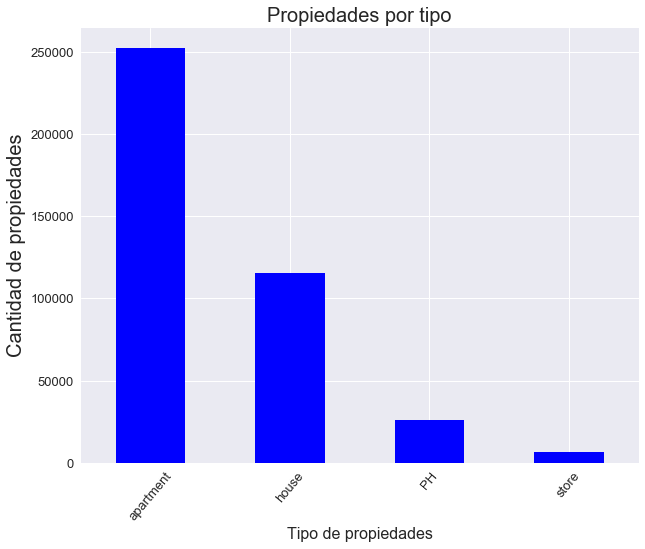

In [15]:
#Analizamos las propiedades por tipo
datos['tipo_propiedad'].value_counts().plot(kind='bar', rot=50, figsize=(10,8), color='blue' ,fontsize=13);
plt.title('Propiedades por tipo', fontsize=20);
plt.xlabel('Tipo de propiedades', fontsize=16);
plt.ylabel('Cantidad de propiedades', fontsize=20);

# Tipos de propiedades en Capital Federal

In [16]:
#Declaramos variable que usaremos durante esa sección
datosCapSinVacios = datosCapital.loc[datosCapital.localidad != '', :]

In [17]:
datosCapSinVacios['total'] = 1
tiposPropiedadCapital = datosCapSinVacios.groupby(['tipo_propiedad']).sum()
tiposPropiedadCapital = tiposPropiedadCapital[['total']].reset_index()
tiposPropiedadCapital.sort_values('total', ascending=False).head(5)

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,tipo_propiedad,total
1,apartment,133125
0,PH,9929
2,house,7952
3,store,2815


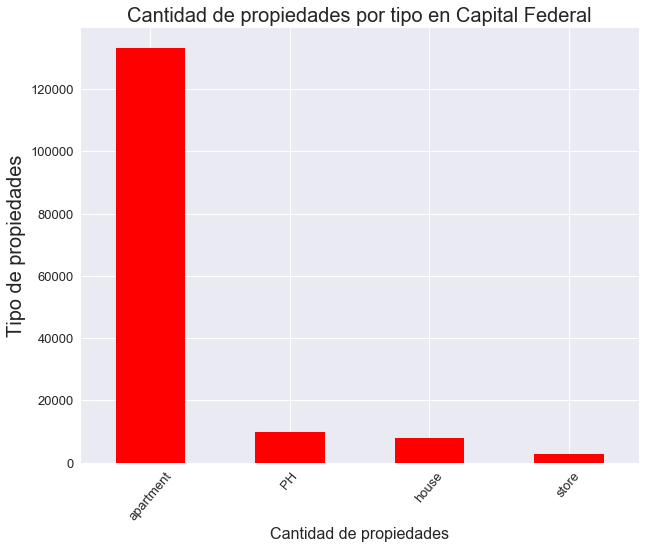

In [18]:
tiposPropiedadCapital2 = datosCapSinVacios['tipo_propiedad'].value_counts().sort_values(ascending=False)
tiposPropiedadCapital2 = tiposPropiedadCapital2.head(5)

tiposPropiedadCapital2.plot(kind='bar', rot=50, figsize=(10,8), color='red' ,fontsize=13);

plt.title('Cantidad de propiedades por tipo en Capital Federal', fontsize=20);
plt.xlabel('Cantidad de propiedades', fontsize=16);
plt.ylabel('Tipo de propiedades', fontsize=20);

In [19]:
#Cantidad de ventas por zona
totalDatosCapitalByPlaces = datosCapSinVacios.groupby(['localidad', 'tipo_propiedad']).sum()
totalDatosCapitalByPlaces = totalDatosCapitalByPlaces[['total']].reset_index()
#totalDatosCapitalByPlaces = totalDatosCapitalByPlaces.sort_values('total', ascending=False)
totalApartamentos =  totalDatosCapitalByPlaces[totalDatosCapitalByPlaces['tipo_propiedad'] == 'apartment']
totalApartamentos.sort_values('total', ascending=False).head(10)


,localidad,tipo_propiedad,total
104,Palermo,apartment,18232
25,Belgrano,apartment,13447
37,Caballito,apartment,8749
218,Villa Urquiza,apartment,6763
21,Barrio Norte,apartment,6622
140,Recoleta,apartment,5978
68,Flores,apartment,5664
96,Nuñez,apartment,5192
175,Villa Crespo,apartment,5179
9,Almagro,apartment,4800


In [20]:
totalCasas = totalDatosCapitalByPlaces[totalDatosCapitalByPlaces['tipo_propiedad'] == 'house']
totalCasas.sort_values('total', ascending=False).head(10)

,localidad,tipo_propiedad,total
26,Belgrano,house,555
105,Palermo,house,507
85,Mataderos,house,488
180,Villa Devoto,house,468
69,Flores,house,468
219,Villa Urquiza,house,389
73,Floresta,house,379
149,Saavedra,house,334
38,Caballito,house,304
223,Villa del Parque,house,281


In [21]:
totalPH = totalDatosCapitalByPlaces[totalDatosCapitalByPlaces['tipo_propiedad'] == 'PH']
totalPH.sort_values('total', ascending=False).head(10)

,localidad,tipo_propiedad,total
103,Palermo,PH,583
217,Villa Urquiza,PH,568
83,Mataderos,PH,531
67,Flores,PH,496
71,Floresta,PH,490
178,Villa Devoto,PH,468
36,Caballito,PH,456
221,Villa del Parque,PH,371
198,Villa Pueyrredón,PH,361
174,Villa Crespo,PH,350


In [22]:
totalStore = totalDatosCapitalByPlaces[totalDatosCapitalByPlaces['tipo_propiedad'] == 'store']
totalStore.sort_values('total', ascending=False).head(10)

,localidad,tipo_propiedad,total
106,Palermo,store,355
177,Villa Crespo,store,219
27,Belgrano,store,156
45,Centro / Microcentro,store,138
142,Recoleta,store,133
23,Barrio Norte,store,120
70,Flores,store,110
15,Balvanera,store,108
162,San Telmo,store,106
90,Monserrat,store,91


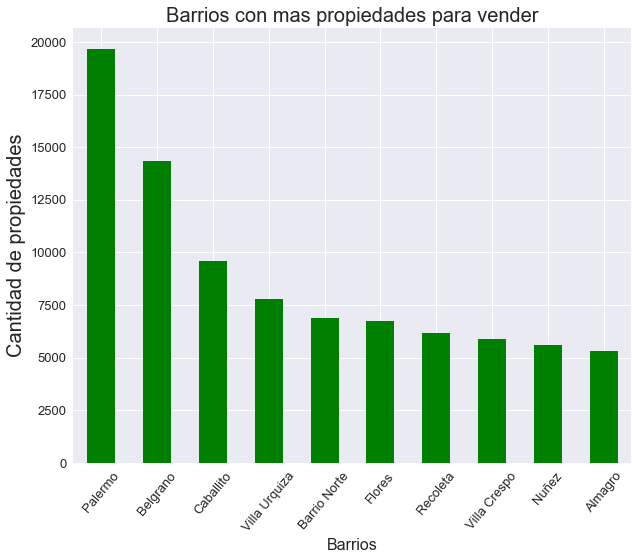

In [23]:
totalPropiedades2_top10 = datosCapSinVacios['localidad'].value_counts().sort_values(ascending=False)
totalPropiedades2_top10 = totalPropiedades2_top10.head(10)

totalPropiedades2_top10.plot(kind='bar', rot=50, figsize=(10,8), color='green' ,fontsize=13);

plt.title('Barrios con mas propiedades para vender', fontsize=20);
plt.xlabel('Barrios', fontsize=16);
plt.ylabel('Cantidad de propiedades', fontsize=20);

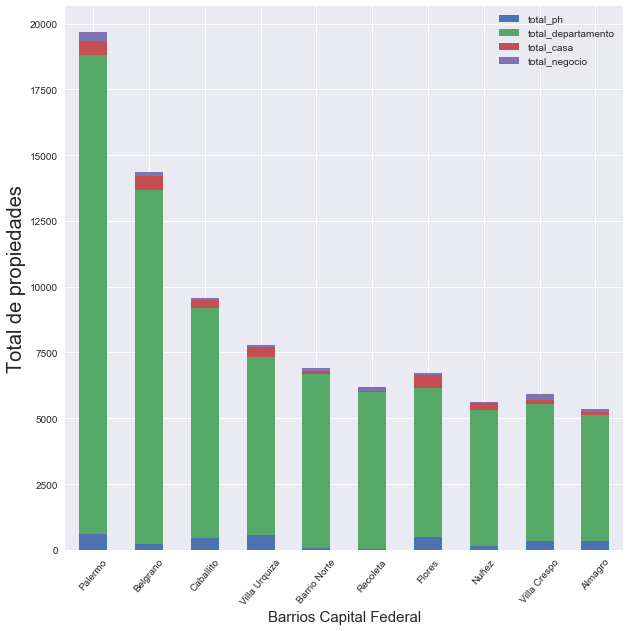

In [24]:
propiedades_ph  = datosCapSinVacios[['localidad','tipo_propiedad']][datosCapSinVacios['tipo_propiedad']=='PH'].groupby('localidad').count()
propiedades_departamento  = datosCapSinVacios[['localidad','tipo_propiedad']][datosCapSinVacios['tipo_propiedad']=='apartment'].groupby('localidad').count()
propiedades_casa  = datosCapSinVacios[['localidad','tipo_propiedad']][datosCapSinVacios['tipo_propiedad']=='house'].groupby('localidad').count()
propiedades_negocio  = datosCapSinVacios[['localidad','tipo_propiedad']][datosCapSinVacios['tipo_propiedad']=='store'].groupby('localidad').count()

propiedades_ph.rename(columns={'tipo_propiedad': 'total_ph'}, inplace=True)
propiedades_departamento.rename(columns={'tipo_propiedad': 'total_departamento'}, inplace=True)
propiedades_casa.rename(columns={'tipo_propiedad': 'total_casa'}, inplace=True)
propiedades_negocio.rename(columns={'tipo_propiedad': 'total_negocio'}, inplace=True)

merge_tipo_prop_x_barrio = pd.merge(pd.merge(pd.merge(propiedades_ph, propiedades_departamento,right_index=True, left_index=True),propiedades_casa,right_index=True, left_index=True), propiedades_negocio,right_index=True, left_index=True)
merge_tipo_prop_x_barrio_top10 = merge_tipo_prop_x_barrio.sort_values('total_departamento',ascending=False).head(10)

merge_tipo_prop_x_barrio_top10.plot(kind="bar", stacked=True , rot=50, figsize=(10,10))
plt.xlabel('Barrios Capital Federal', fontsize=15);
plt.ylabel('Total de propiedades', fontsize=20);

## Precios por M2

In [25]:
#Precios En Capital Federal
datosCapital.sort_values('precio_por_m2', ascending=False)

,fecha,descripcion,piso,lugar,precio,precio_por_m2,tipo_propiedad,habitaciones,superficie_m2,superficie_cubierta_m2,superficie_total_m2,url,expensas,pais,provincia,localidad
11053,2016-04-07,Popopopo - Publicado a traves de VisualGestion -,NaN,|Argentina|Capital Federal|,15252325.00,1.271027e+06,PH,1.0,NaN,15.0,12.0,http://www.properati.com.ar/xnmi_venta_ph_ramo...,NaN,Argentina,Capital Federal,
24127,2013-06-21,NaN,NaN,|Argentina|Capital Federal|,12208458.37,3.052115e+05,apartment,1.0,40.0,NaN,NaN,http://www.properati.com.ar/8162_venta_departa...,NaN,Argentina,Capital Federal,
36348,2014-02-21,NaN,1.0,|Argentina|Capital Federal|Nuñez|,10948272.81,2.606732e+05,apartment,2.0,42.0,NaN,NaN,http://www.properati.com.ar/d9cg_venta_departa...,NaN,Argentina,Capital Federal,Nuñez
41687,2017-04-28,Departamento 1 ambiente divisible Depto en CU...,NaN,|Argentina|Capital Federal|Boedo|,6809000.00,2.063333e+05,apartment,1.0,NaN,33.0,33.0,http://www.properati.com.ar/17rbf_venta_depart...,NaN,Argentina,Capital Federal,Boedo
54550,2013-09-14,NaN,NaN,|Argentina|Capital Federal|,3900000.00,1.950000e+05,house,6.0,20.0,NaN,NaN,http://www.properati.com.ar/9tyh_venta_casa_ca...,NaN,Argentina,Capital Federal,
41071,2017-04-28,lan840- DEPTO FINANCIACION DIRECTA EN PESOSAnt...,NaN,|Argentina|Capital Federal|Boedo|,5214782.00,1.738261e+05,apartment,1.0,NaN,30.0,30.0,http://www.properati.com.ar/17qou_venta_depart...,NaN,Argentina,Capital Federal,Boedo
55532,2013-09-18,NaN,NaN,|Argentina|Capital Federal|Recoleta|,30000000.00,1.428571e+05,apartment,4.0,210.0,NaN,NaN,http://www.properati.com.ar/9va3_venta_departa...,NaN,Argentina,Capital Federal,Recoleta
13798,2013-06-13,NaN,NaN,|Argentina|Capital Federal|,11111111.00,1.234568e+05,house,3.0,90.0,NaN,NaN,http://www.properati.com.ar/7u7c_venta_casa_it...,NaN,Argentina,Capital Federal,
41231,2017-04-28,fac030- Depto anticipo en 10 meses y saldo en ...,NaN,|Argentina|Capital Federal|Boedo|,3657014.00,1.044861e+05,apartment,1.0,NaN,35.0,35.0,http://www.properati.com.ar/17quf_venta_depart...,NaN,Argentina,Capital Federal,Boedo
54811,2014-03-14,NaN,NaN,|Argentina|Capital Federal|,1850000.00,9.250000e+04,house,4.0,20.0,NaN,NaN,http://www.properati.com.ar/dzcy_venta_casa_ca...,NaN,Argentina,Capital Federal,


In [26]:
datosCapitalByM2 = datosCapSinVacios.groupby(['localidad','tipo_propiedad']).mean()
datosCapitalByM2 = datosCapitalByM2[['precio_por_m2', 'habitaciones']].reset_index()
datosCapitalByM2.sort_values('precio_por_m2', ascending=False).head(10)

,localidad,tipo_propiedad,precio_por_m2,habitaciones
136,Puerto Madero,apartment,5412.378753,2.913428
138,Puerto Madero,store,4966.753644,1.000000
142,Recoleta,store,4801.085897,1.000000
23,Barrio Norte,store,4180.507913,3.900000
106,Palermo,store,4158.515111,1.750000
33,Boedo,apartment,3976.370377,1.405923
137,Puerto Madero,house,3874.755256,5.750000
102,Once,store,3867.551322,2.571429
152,San Cristobal,apartment,3760.944312,1.583302
177,Villa Crespo,store,3705.204003,1.421053


In [27]:
promedioM2Apartment = datosCapitalByM2[datosCapitalByM2['tipo_propiedad'] == 'apartment']
promedioM2Apartment.sort_values('precio_por_m2', ascending=False).head(10)

,localidad,tipo_propiedad,precio_por_m2,habitaciones
136,Puerto Madero,apartment,5412.378753,2.913428
33,Boedo,apartment,3976.370377,1.405923
152,San Cristobal,apartment,3760.944312,1.583302
76,Las Cañitas,apartment,3351.443847,2.527211
96,Nuñez,apartment,3159.025864,2.317390
104,Palermo,apartment,3147.486641,2.541348
140,Recoleta,apartment,3130.339454,3.471749
51,Coghlan,apartment,2862.931708,1.995905
25,Belgrano,apartment,2860.832639,2.672141
21,Barrio Norte,apartment,2748.131155,3.049325


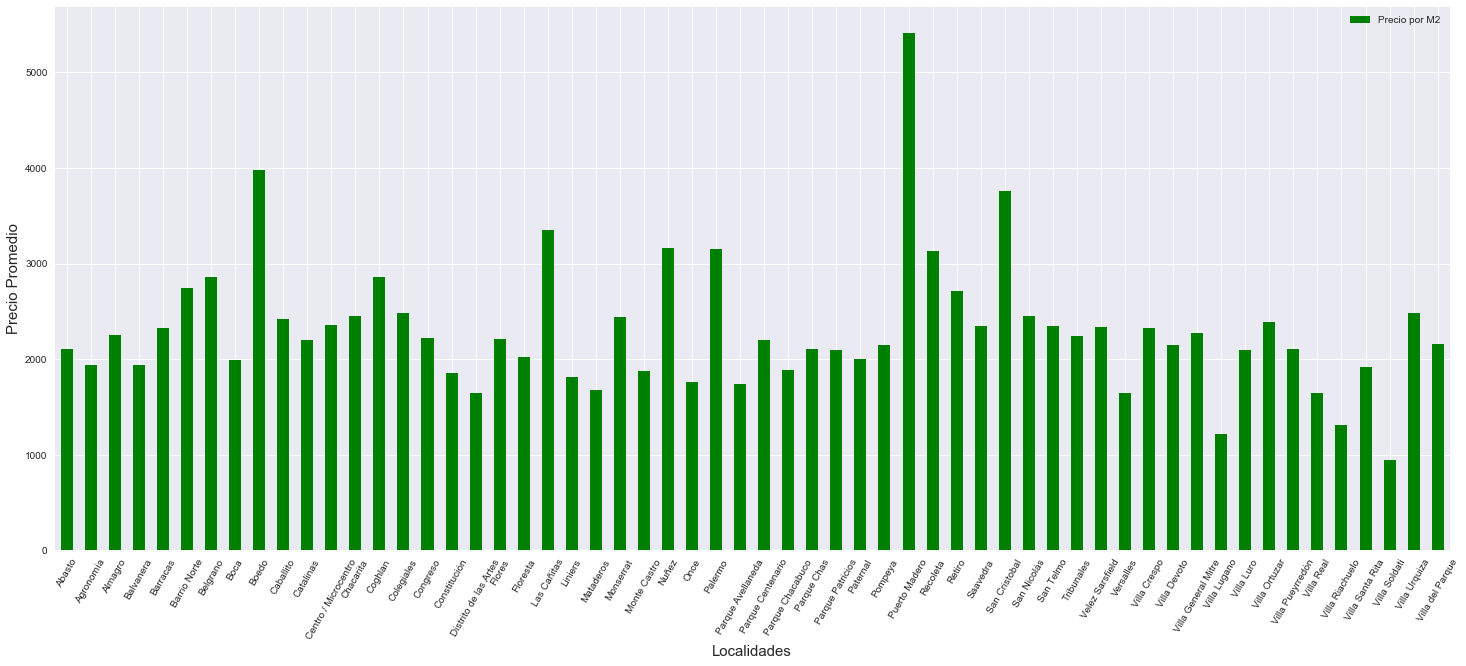

In [83]:
graficoDepartamento = promedioM2Apartment[['localidad','precio_por_m2']].set_index('localidad')
graficoDepartamento.rename(columns={'precio_por_m2':'Precio por M2'},inplace=True)
graficoDepartamento.plot(kind="bar", stacked=True , rot=60, figsize=(25,10), color='green')

plt.xlabel('Localidades', fontsize=15);
plt.ylabel('Precio Promedio', fontsize=15);

In [28]:
promedioM2House = datosCapitalByM2[datosCapitalByM2['tipo_propiedad'] == 'house']
promedioM2House.sort_values('precio_por_m2', ascending=False).head(10)

,localidad,tipo_propiedad,precio_por_m2,habitaciones
137,Puerto Madero,house,3874.755256,5.750000
141,Recoleta,house,3395.752060,2.857143
105,Palermo,house,3066.988451,4.621053
34,Boedo,house,2546.341864,4.123077
77,Las Cañitas,house,2362.329393,4.000000
26,Belgrano,house,2265.423003,4.948980
2,Abasto,house,1883.372113,3.000000
97,Nuñez,house,1879.200234,4.894737
145,Retiro,house,1838.613702,7.000000
172,Versalles,house,1806.124216,4.388889


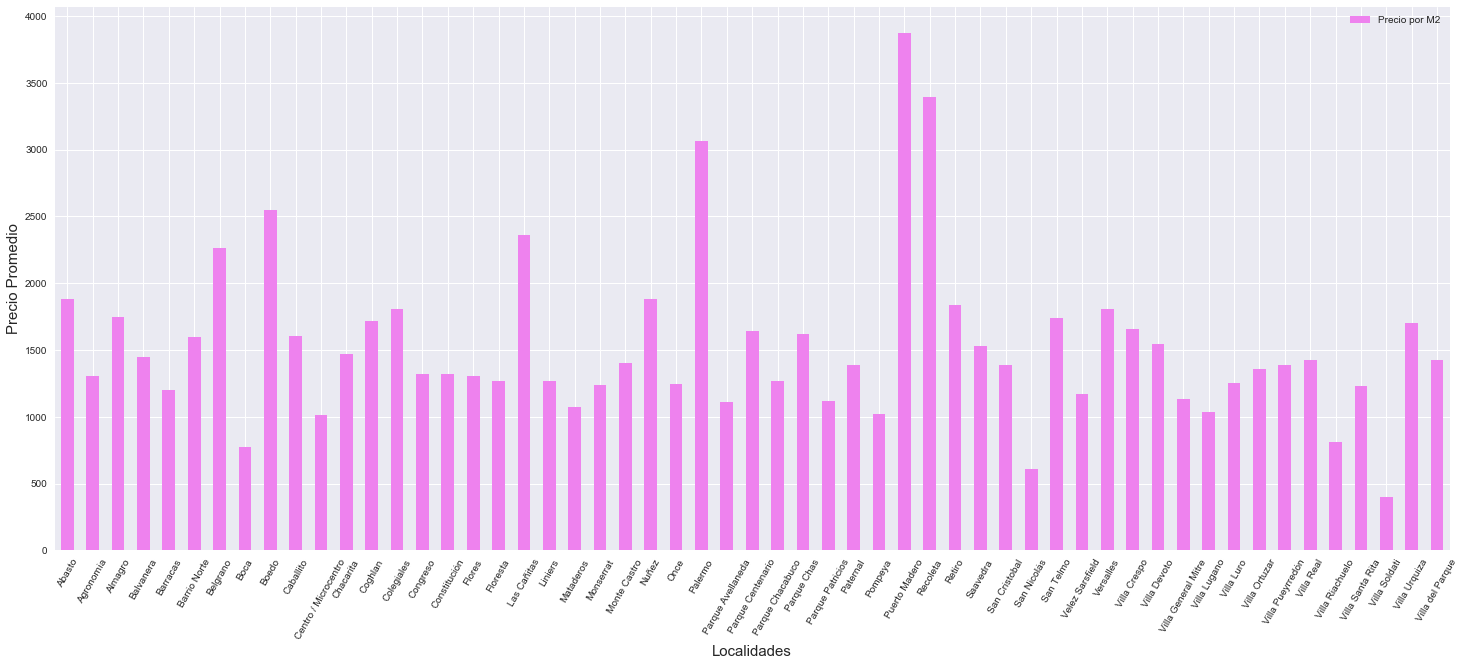

In [90]:
graficoHouse= promedioM2House[['localidad','precio_por_m2']].set_index('localidad')
graficoHouse.rename(columns={'precio_por_m2':'Precio por M2'},inplace=True)
graficoHouse.plot(kind="bar", stacked=True , rot=60, figsize=(25,10), color='violet')

plt.xlabel('Localidades', fontsize=15);
plt.ylabel('Precio Promedio', fontsize=15);

In [29]:
promedioM2PH = datosCapitalByM2[datosCapitalByM2['tipo_propiedad'] == 'PH']
promedioM2PH.sort_values('precio_por_m2', ascending=False).head(10)

,localidad,tipo_propiedad,precio_por_m2,habitaciones
143,Retiro,PH,3283.582090,2.000000
75,Las Cañitas,PH,2515.695187,2.200000
139,Recoleta,PH,2196.776503,3.730769
103,Palermo,PH,2184.732069,3.403587
24,Belgrano,PH,2075.155550,3.538462
50,Coghlan,PH,2072.050679,3.072464
20,Barrio Norte,PH,2062.226404,3.557692
95,Nuñez,PH,1948.639137,3.541284
147,Saavedra,PH,1828.903327,2.926357
54,Colegiales,PH,1809.414093,3.419643


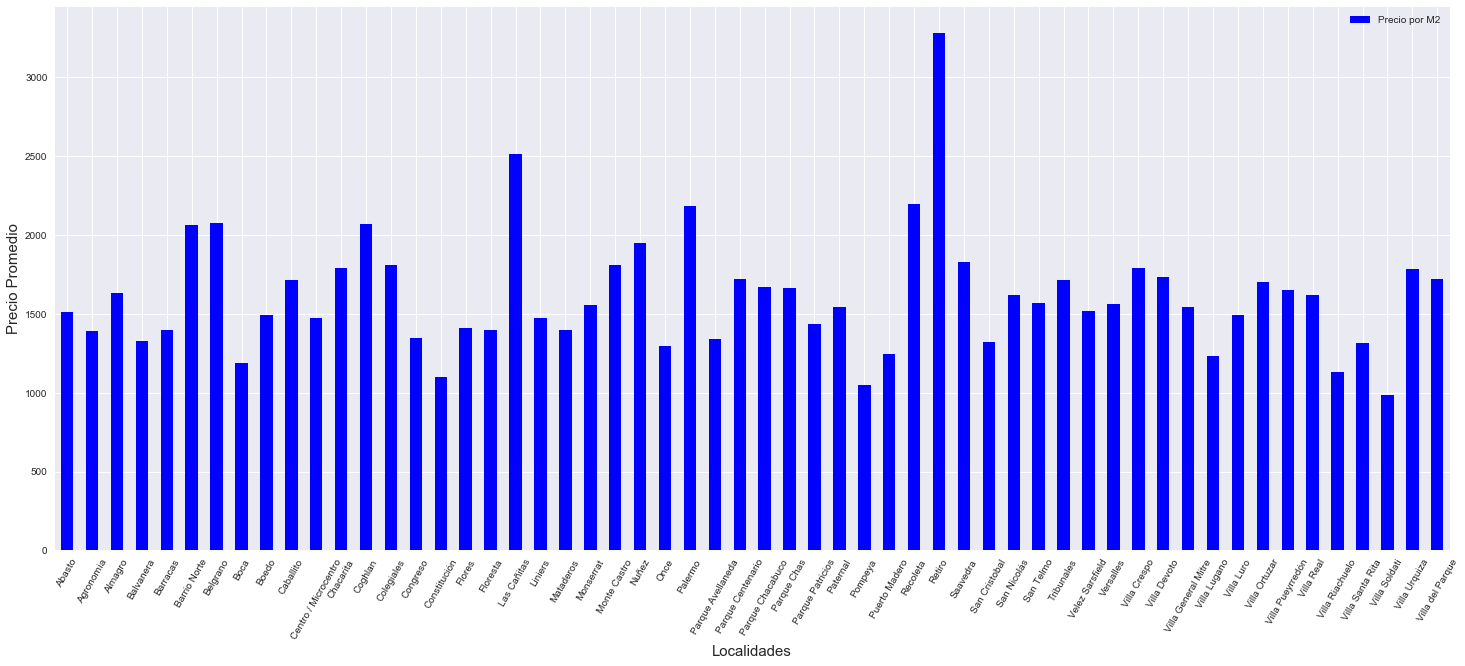

In [89]:
graficoPH = promedioM2PH[['localidad','precio_por_m2']].set_index('localidad')
graficoPH.rename(columns={'precio_por_m2':'Precio por M2'},inplace=True)
graficoPH.plot(kind="bar", stacked=True , rot=60, figsize=(25,10), color='blue')

plt.xlabel('Localidades', fontsize=15);
plt.ylabel('Precio Promedio', fontsize=15);

In [86]:
promedioM2Store = datosCapitalByM2[datosCapitalByM2['tipo_propiedad'] == 'store']
promedioM2Store.sort_values('precio_por_m2', ascending=False).head()


,localidad,tipo_propiedad,precio_por_m2,habitaciones
138,Puerto Madero,store,4966.753644,1.000000
142,Recoleta,store,4801.085897,1.000000
23,Barrio Norte,store,4180.507913,3.900000
106,Palermo,store,4158.515111,1.750000
102,Once,store,3867.551322,2.571429


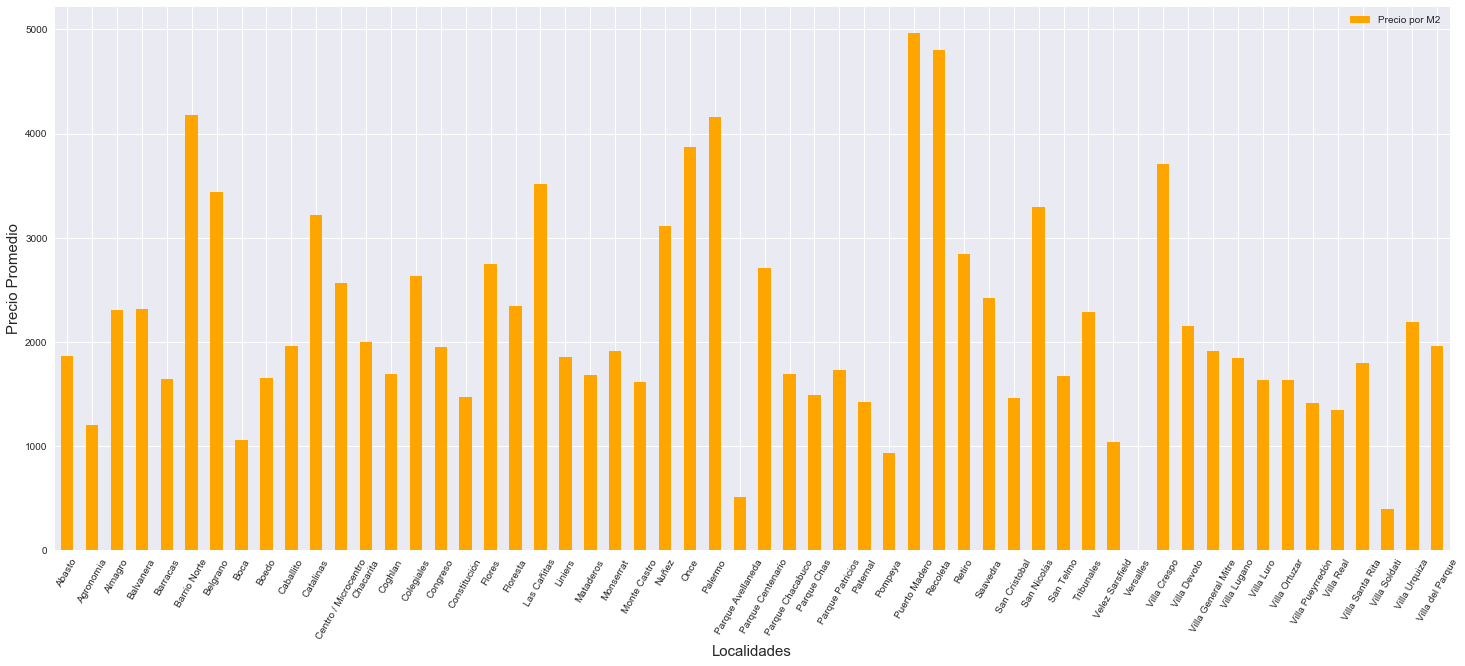

In [88]:
graficoStore = promedioM2Store[['localidad','precio_por_m2']].set_index('localidad')
graficoStore.rename(columns={'precio_por_m2':'Precio por M2'},inplace=True)
graficoStore.plot(kind="bar", stacked=True , rot=60, figsize=(25,10), color='orange')

plt.xlabel('Localidades', fontsize=15);
plt.ylabel('Precio Promedio', fontsize=15);

# Precio en relación a superficie cubierta

In [32]:
datosCapitalBySurface = datosCapital.sort_values('superficie_cubierta_m2', ascending=False)
datosCapitalBySurface.head(10)

,fecha,descripcion,piso,lugar,precio,precio_por_m2,tipo_propiedad,habitaciones,superficie_m2,superficie_cubierta_m2,superficie_total_m2,url,expensas,pais,provincia,localidad
142119,2017-07-19,Barrio Norte EXCELENTE Semipiso al Frente Balc...,NaN,|Argentina|Capital Federal|Barrio Norte|,600000.0,NaN,apartment,NaN,NaN,187000.0,NaN,http://www.properati.com.ar/1ar12_venta_depart...,11000,Argentina,Capital Federal,Barrio Norte
14262,2014-09-19,CODIGO: ubicado en: Humboldt 2000 - Publicad...,NaN,|Argentina|Capital Federal|Palermo|Palermo Hol...,500000.0,4.761905,apartment,NaN,NaN,103000.0,105000.0,http://www.properati.com.ar/inuy_venta_departa...,NaN,Argentina,Capital Federal,Palermo
24518,2016-05-02,CODIGO: 456-JDPVBE1 ubicado en: BLANCO ENCALAD...,NaN,|Argentina|Capital Federal|Villa Urquiza|,138000.0,2.224587,apartment,NaN,NaN,62034.0,62034.0,http://www.properati.com.ar/y5dl_venta_departa...,NaN,Argentina,Capital Federal,Villa Urquiza
3835,2014-03-25,CODIGO: 464-02 ubicado en: Av. San Juan al 270...,NaN,|Argentina|Capital Federal|San Cristobal|,319000.0,1070.469799,store,NaN,NaN,22518.0,298.0,http://www.properati.com.ar/eikd_venta_local_s...,NaN,Argentina,Capital Federal,San Cristobal
135222,2017-07-19,C.A.B.A - Villa Soldati - CÓDIGO 0146Excelente...,NaN,|Argentina|Capital Federal|Villa Soldati|,8500000.0,775.688994,store,NaN,NaN,10958.0,10958.0,http://www.properati.com.ar/1ahu2_venta_local_...,1,Argentina,Capital Federal,Villa Soldati
34540,2016-06-10,Venta de Negocio 5 AMBIENTES en BoedoVENTA DE ...,NaN,|Argentina|Capital Federal|Boedo|,1600000.0,160.000000,store,5.0,NaN,10000.0,10000.0,http://www.properati.com.ar/yyr9_venta_local_b...,NaN,Argentina,Capital Federal,Boedo
122591,2017-07-04,Corredor Responsable: Uno Bienes Raices SRL - ...,3.0,|Argentina|Capital Federal|Monte Castro|,138000.0,NaN,apartment,4.0,NaN,9152.0,NaN,http://www.properati.com.ar/19r6g_venta_depart...,NaN,Argentina,Capital Federal,Monte Castro
122898,2017-07-05,Corredor Responsable: Jorge Salafia - CUCICBA ...,NaN,|Argentina|Capital Federal|Liniers|,165000.0,NaN,house,4.0,NaN,8175.0,NaN,http://www.properati.com.ar/19rpq_venta_casa_l...,NaN,Argentina,Capital Federal,Liniers
132152,2017-07-19,C.A.B.A - Boca - PRECIO A CONSULTAR - CÓDIGO 0...,NaN,|Argentina|Capital Federal|Boca|,8000000.0,1036.001036,store,NaN,NaN,7722.0,7722.0,http://www.properati.com.ar/1ad9w_venta_local_...,1,Argentina,Capital Federal,Boca
54544,2017-05-21,Corredor Responsable: Martin Macagno - CUCICBA...,2.0,|Argentina|Capital Federal|Villa Crespo|,140000.0,NaN,apartment,3.0,NaN,7630.0,NaN,http://www.properati.com.ar/18gnz_venta_depart...,NaN,Argentina,Capital Federal,Villa Crespo


In [33]:
#Supongo que si hay superficie cubierta es menor a la total, hay balcones. Y quiero ver esa diferencia
datosCapitalBalcon = datosCapital[datosCapital['superficie_total_m2'] > datosCapital['superficie_cubierta_m2']]
datosCapitalBalcon.sort_values('precio', ascending=False).head()

,fecha,descripcion,piso,lugar,precio,precio_por_m2,tipo_propiedad,habitaciones,superficie_m2,superficie_cubierta_m2,superficie_total_m2,url,expensas,pais,provincia,localidad
21854,2017-03-14,Sobre 7832m2 de lote existen 4111m2 cubiertas ...,NaN,|Argentina|Capital Federal|,8500000.0,1085.291113,house,NaN,NaN,4111.0,7832.0,http://www.properati.com.ar/16bc5_venta_casa_b...,NaN,Argentina,Capital Federal,
33360,2015-07-23,PISO COMPLETO EN LE PARC!! - Impresionante pis...,NaN,|Argentina|Capital Federal|Palermo|,8000000.0,10256.410256,apartment,NaN,NaN,0.0,780.0,http://www.properati.com.ar/s2e1_venta_departa...,NaN,Argentina,Capital Federal,Palermo
43285,2015-06-18,VENTA DEPARTAMENTO PISO DE 2 UNIDADES ANEXADAS...,NaN,|Argentina|Capital Federal|Palermo|,8000000.0,10000.000000,apartment,6.0,NaN,0.0,800.0,http://www.properati.com.ar/rgf4_venta_departa...,NaN,Argentina,Capital Federal,Palermo
54799,2016-12-01,Unidad para reciclar. Titulos perfectos. (no e...,NaN,|Argentina|Capital Federal|Palermo|,7500000.0,9375.000000,apartment,4.0,NaN,750.0,800.0,http://www.properati.com.ar/13uyh_venta_depart...,NaN,Argentina,Capital Federal,Palermo
30699,2015-06-26,CODIGO: 617-REALTY301 ubicado en: Cerviño 4600...,NaN,|Argentina|Capital Federal|Palermo|,6800000.0,56666.666667,apartment,NaN,NaN,119.0,120.0,http://www.properati.com.ar/rkiw_venta_departa...,NaN,Argentina,Capital Federal,Palermo


In [34]:
datosCapitalBalconGP = datosCapitalBalcon.groupby(['localidad','tipo_propiedad']).mean()
datosCapitalBalconGP = datosCapitalBalconGP[['precio_por_m2','precio','superficie_total_m2', 'superficie_cubierta_m2']].reset_index()

In [135]:
promedioApartment = datosCapitalBalconGP[datosCapitalBalconGP['tipo_propiedad'] == 'apartment']
promedioApartment.sort_values('precio_por_m2', ascending=False).head(10)

,localidad,tipo_propiedad,precio_por_m2,precio,superficie_total_m2,superficie_cubierta_m2
134,Puerto Madero,apartment,5601.442666,817604.819853,141.976103,117.275735
78,Las Cañitas,apartment,3490.014673,327610.055556,104.175926,86.791667
104,Palermo,apartment,3295.408266,325735.501237,118.448276,100.317909
138,Recoleta,apartment,3130.489377,417578.072781,134.919390,114.826434
29,Belgrano,apartment,3065.900585,327090.819453,107.461055,89.298442
97,Nuñez,apartment,3004.422959,315322.657774,93.613559,74.763842
142,Retiro,apartment,2994.366258,457985.881189,151.502703,131.410811
25,Barrio Norte,apartment,2923.015930,320969.221510,112.589838,95.587629
58,Colegiales,apartment,2607.721686,169658.811789,71.247368,57.536842
211,Villa Urquiza,apartment,2482.254933,150709.350332,77.578059,65.030139


In [134]:
promedioHouse = datosCapitalBalconGP[datosCapitalBalconGP['tipo_propiedad'] == 'house']
promedioHouse.sort_values('precio_por_m2', ascending=False).head(10)

,localidad,tipo_propiedad,precio_por_m2,precio,superficie_total_m2,superficie_cubierta_m2
135,Puerto Madero,house,3476.592413,1.683000e+06,394.800000,310.000000
139,Recoleta,house,3368.519553,1.148000e+06,337.600000,242.800000
79,Las Cañitas,house,2832.868937,6.293333e+05,221.666667,172.000000
105,Palermo,house,2657.311375,1.056182e+06,395.436508,270.468254
30,Belgrano,house,2234.478487,1.091390e+06,496.050000,342.328571
98,Nuñez,house,2005.237026,5.535000e+05,302.800000,229.960000
26,Barrio Norte,house,2004.956707,1.056250e+06,637.750000,428.875000
6,Abasto,house,1937.500000,3.245000e+05,230.000000,166.500000
212,Villa Urquiza,house,1803.899479,3.180366e+05,235.183099,167.126761
59,Colegiales,house,1692.312581,5.250122e+05,340.097561,241.975610


In [136]:
promedioPH = datosCapitalBalconGP[datosCapitalBalconGP['tipo_propiedad'] == 'PH']
promedioPH.sort_values('precio_por_m2', ascending=False).head(10)

,localidad,tipo_propiedad,precio_por_m2,precio,superficie_total_m2,superficie_cubierta_m2
141,Retiro,PH,3283.582090,220000.000000,67.000000,65.000000
77,Las Cañitas,PH,2545.454545,280000.000000,110.000000,100.000000
137,Recoleta,PH,2126.579926,276650.000000,150.400000,125.800000
53,Coghlan,PH,2098.774457,206107.407407,113.111111,83.000000
28,Belgrano,PH,2092.356586,278096.721311,141.786885,105.590164
24,Barrio Norte,PH,2065.758921,270150.000000,142.850000,108.650000
103,Palermo,PH,2063.257978,269159.523810,140.314286,102.914286
45,Centro / Microcentro,PH,1985.564648,145000.000000,74.000000,64.000000
145,Saavedra,PH,1910.684764,179728.767123,110.616438,81.273973
96,Nuñez,PH,1893.888554,236205.128205,135.358974,94.564103


In [137]:
promedioStore = datosCapitalBalconGP[datosCapitalBalconGP['tipo_propiedad'] == 'store']
promedioStore.sort_values('precio_por_m2', ascending=False).head(10)

,localidad,tipo_propiedad,precio_por_m2,precio,superficie_total_m2,superficie_cubierta_m2
140,Recoleta,store,4133.546580,9.398576e+05,188.153846,155.692308
136,Puerto Madero,store,3773.584906,2.800000e+06,742.000000,402.000000
60,Colegiales,store,3394.871795,1.253333e+05,51.333333,42.000000
31,Belgrano,store,3150.333508,6.385579e+05,239.615385,177.769231
99,Nuñez,store,3101.830871,1.075274e+06,379.750000,231.000000
106,Palermo,store,2905.878074,6.293052e+05,245.666667,176.850000
27,Barrio Norte,store,2866.298309,5.117619e+05,232.857143,107.571429
156,San Nicolás,store,2751.637230,6.514545e+05,317.454545,163.727273
174,Villa Crespo,store,2380.109652,4.044375e+05,259.968750,212.406250
213,Villa Urquiza,store,2271.090376,4.292000e+05,221.384615,154.769231


# Precios donde no hay diferencia entre superficies

In [93]:
datosCapitalSinBalcon= datosCapital[datosCapital['superficie_total_m2'] == datosCapital['superficie_cubierta_m2']]
datosCapitalSinBalcon= datosCapitalSinBalcon[datosCapitalSinBalcon['superficie_total_m2'] > 1]
datosCapitalSinBalcon.sort_values('precio', ascending=False).head()

,fecha,descripcion,piso,lugar,precio,precio_por_m2,tipo_propiedad,habitaciones,superficie_m2,superficie_cubierta_m2,superficie_total_m2,url,expensas,pais,provincia,localidad,month,year,total
56324,2016-12-07,"Inmueble construido sobre fracción de 3.534,00...",NaN,|Argentina|Capital Federal|Barracas|,12000000.0,2400.000000,store,NaN,NaN,5000.0,5000.0,http://www.properati.com.ar/142ao_venta_local_...,NaN,Argentina,Capital Federal,Barracas,12,2016,1
65638,2017-06-09,CONTACTO: MARTIN PINUS 15- EXCELENTISIMA PROPI...,NaN,|Argentina|Capital Federal|Palermo|Palermo Chico|,8500000.0,20731.707317,apartment,5.0,NaN,410.0,410.0,http://www.properati.com.ar/19121_venta_depart...,NaN,Argentina,Capital Federal,Palermo,6,2017,1
135222,2017-07-19,C.A.B.A - Villa Soldati - CÓDIGO 0146Excelente...,NaN,|Argentina|Capital Federal|Villa Soldati|,8500000.0,775.688994,store,NaN,NaN,10958.0,10958.0,http://www.properati.com.ar/1ahu2_venta_local_...,1,Argentina,Capital Federal,Villa Soldati,7,2017,1
65637,2017-06-09,CONTACTO: MARTIN PINUS 15- EXCELENTISIMA PROPI...,NaN,|Argentina|Capital Federal|Palermo|Palermo Chico|,8000000.0,19512.195122,apartment,5.0,NaN,410.0,410.0,http://www.properati.com.ar/1911z_venta_depart...,NaN,Argentina,Capital Federal,Palermo,6,2017,1
132152,2017-07-19,C.A.B.A - Boca - PRECIO A CONSULTAR - CÓDIGO 0...,NaN,|Argentina|Capital Federal|Boca|,8000000.0,1036.001036,store,NaN,NaN,7722.0,7722.0,http://www.properati.com.ar/1ad9w_venta_local_...,1,Argentina,Capital Federal,Boca,7,2017,1


In [97]:
datosCapitalSinBalconGP = datosCapitalSinBalcon.groupby(['localidad','tipo_propiedad']).mean().reset_index()

In [102]:
promedioApartmentSinBalcon = datosCapitalSinBalconGP[datosCapitalSinBalconGP['tipo_propiedad'] == 'apartment']
promedioApartmentSinBalcon.sort_values('precio_por_m2', ascending=False).head(10)

,localidad,tipo_propiedad,piso,precio,precio_por_m2,habitaciones,superficie_m2,superficie_cubierta_m2,superficie_total_m2,month,year,total
149,San Cristobal,apartment,6.300000,3.032342e+05,9303.098190,1.620079,NaN,43.985455,43.985455,5.058182,2016.263636,1.0
36,Boedo,apartment,2.666667,1.838717e+05,6017.947358,1.138633,NaN,31.505466,31.505466,5.623794,2016.046945,1.0
134,Puerto Madero,apartment,6.571429,1.012662e+06,5876.822918,3.247283,NaN,164.061185,164.061185,7.332696,2016.284895,1.0
104,Palermo,apartment,60.370079,3.444022e+05,3436.486778,2.664581,NaN,85.431818,85.431818,5.830000,2016.450000,1.0
138,Recoleta,apartment,5.102804,4.131712e+05,3419.768097,3.580827,NaN,124.158537,124.158537,6.220867,2016.489160,1.0
77,Las Cañitas,apartment,9.200000,2.948269e+05,3361.355310,2.529412,NaN,84.066667,84.066667,5.080000,2016.746667,1.0
97,Nuñez,apartment,5.375000,2.912838e+05,3116.536320,2.484375,NaN,75.000000,75.000000,5.385057,2016.419540,1.0
12,Almagro,apartment,3.884058,1.372045e+05,3053.989977,2.176796,NaN,51.582979,51.582979,5.506383,2016.408511,1.0
28,Belgrano,apartment,5.530612,2.611338e+05,2934.904830,2.783877,NaN,86.796935,86.796935,5.858238,2016.307791,1.0
24,Barrio Norte,apartment,5.906250,2.459044e+05,2777.274412,3.064516,NaN,99.717514,99.717514,5.909605,2016.381356,1.0


In [103]:
promedioHouseSinBalcon = datosCapitalSinBalconGP[datosCapitalSinBalconGP['tipo_propiedad'] == 'house']
promedioHouseSinBalcon.sort_values('precio_por_m2', ascending=False).head(10)

,localidad,tipo_propiedad,piso,precio,precio_por_m2,habitaciones,superficie_m2,superficie_cubierta_m2,superficie_total_m2,month,year,total
37,Boedo,house,NaN,3.413231e+05,6246.720043,1.400000,NaN,141.115385,141.115385,5.692308,2016.807692,1.0
135,Puerto Madero,house,NaN,1.490000e+06,4870.162364,NaN,NaN,307.000000,307.000000,8.000000,2016.500000,1.0
105,Palermo,house,NaN,1.313512e+06,3833.340109,5.333333,NaN,363.441860,363.441860,5.790698,2016.372093,1.0
13,Almagro,house,NaN,6.395000e+05,3427.855747,6.000000,NaN,478.700000,478.700000,6.100000,2016.300000,1.0
139,Recoleta,house,NaN,1.512500e+06,3392.230576,NaN,NaN,527.500000,527.500000,4.500000,2016.500000,1.0
25,Barrio Norte,house,NaN,1.200000e+06,3018.741620,5.666667,NaN,408.416667,408.416667,5.916667,2016.083333,1.0
78,Las Cañitas,house,NaN,6.800000e+05,3009.433962,NaN,NaN,226.500000,226.500000,8.000000,2016.000000,1.0
29,Belgrano,house,5.0,1.064531e+06,2714.298356,5.681818,NaN,393.109375,393.109375,6.281250,2016.156250,1.0
98,Nuñez,house,NaN,4.439923e+05,2251.361018,4.833333,NaN,218.307692,218.307692,6.230769,2016.384615,1.0
62,Congreso,house,NaN,6.300000e+04,2250.000000,1.000000,NaN,28.000000,28.000000,4.000000,2017.000000,1.0


In [104]:
promedioPHSinBalcon = datosCapitalSinBalconGP[datosCapitalSinBalconGP['tipo_propiedad'] == 'PH']
promedioPHSinBalcon.sort_values('precio_por_m2', ascending=False).head(10)

,localidad,tipo_propiedad,piso,precio,precio_por_m2,habitaciones,superficie_m2,superficie_cubierta_m2,superficie_total_m2,month,year,total
76,Las Cañitas,PH,NaN,158000.000000,2872.727273,2.000000,NaN,55.000000,55.000000,2.000000,2017.000000,1.0
103,Palermo,PH,3.25,192878.378378,2719.793710,3.068966,NaN,79.216216,79.216216,5.621622,2016.567568,1.0
27,Belgrano,PH,5.60,210941.176471,2484.350276,3.363636,NaN,87.352941,87.352941,5.352941,2016.470588,1.0
52,Coghlan,PH,6.00,183500.000000,2473.443223,3.250000,NaN,77.000000,77.000000,4.000000,2017.000000,1.0
96,Nuñez,PH,NaN,277450.000000,2421.953844,3.200000,NaN,111.300000,111.300000,5.700000,2016.700000,1.0
137,Recoleta,PH,2.00,97400.000000,2418.382271,3.000000,NaN,60.300000,60.300000,4.000000,2016.300000,1.0
23,Barrio Norte,PH,1.00,179250.000000,2370.472623,2.857143,NaN,72.000000,72.000000,5.875000,2016.625000,1.0
48,Chacarita,PH,1.00,133000.000000,2325.997151,3.000000,NaN,57.600000,57.600000,6.400000,2016.400000,1.0
152,San Nicolás,PH,NaN,155000.000000,2289.952719,2.666667,NaN,79.000000,79.000000,8.000000,2016.666667,1.0
162,Velez Sarsfield,PH,NaN,54960.000000,2245.641026,2.000000,NaN,50.200000,50.200000,4.600000,2016.400000,1.0


In [120]:
promedioStoreSinBalcon = datosCapitalSinBalconGP[datosCapitalSinBalconGP['tipo_propiedad'] == 'store']
promedioStoreSinBalcon.sort_values('precio_por_m2', ascending=False).head(10)

,localidad,tipo_propiedad,piso,precio,precio_por_m2,habitaciones,superficie_m2,superficie_cubierta_m2,superficie_total_m2,month,year,total
136,Puerto Madero,store,NaN,1.494857e+06,5619.067908,NaN,NaN,315.214286,315.214286,6.642857,2016.500000,1.0
140,Recoleta,store,NaN,6.442384e+05,4934.413211,1.0,NaN,161.476744,161.476744,6.662791,2016.616279,1.0
26,Barrio Norte,store,NaN,4.973333e+05,4727.489817,4.0,NaN,170.458333,170.458333,5.541667,2016.402778,1.0
106,Palermo,store,NaN,5.034432e+05,4518.709415,1.3,NaN,144.888268,144.888268,7.145251,2015.899441,1.0
102,Once,store,NaN,6.291836e+05,4174.175872,2.5,NaN,341.557692,341.557692,6.826923,2015.615385,1.0
170,Villa Crespo,store,NaN,4.431972e+05,3977.224149,1.0,NaN,147.250000,147.250000,6.298611,2016.013889,1.0
79,Las Cañitas,store,NaN,9.500000e+05,3766.513057,NaN,NaN,322.500000,322.500000,7.250000,2016.000000,1.0
30,Belgrano,store,1.0,2.691973e+05,3568.057073,1.5,NaN,97.355556,97.355556,5.255556,2016.022222,1.0
155,San Nicolás,store,NaN,6.349866e+05,3251.561872,1.7,NaN,303.042553,303.042553,5.893617,2016.340426,1.0
43,Catalinas,store,NaN,3.700000e+05,3217.391304,NaN,NaN,115.000000,115.000000,6.000000,2015.000000,1.0


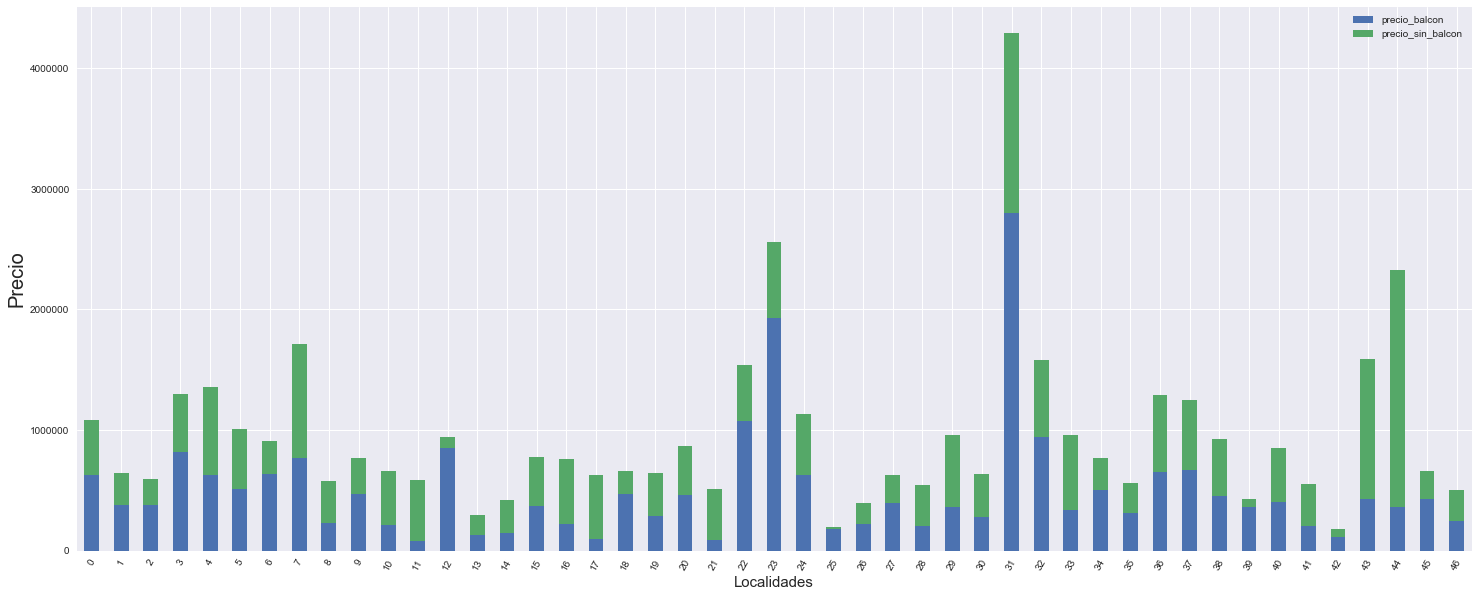

In [138]:
promedioStoreFiltered = promedioStore[['localidad', 'precio']].rename(columns={'precio':'precio_balcon'})
promedioStoreSinBalconFiltered = promedioStoreSinBalcon[['localidad', 'precio']].rename(columns={'precio':'precio_sin_balcon'})

#promedioStoreFiltered.head()


preciosStore = pd.merge(promedioStoreFiltered,promedioStoreSinBalconFiltered, on='localidad')
preciosStore.plot(kind="bar", stacked=True , rot=60, figsize=(25,10))

plt.xlabel('Localidades', fontsize=15);
plt.ylabel('Precio', fontsize=20);



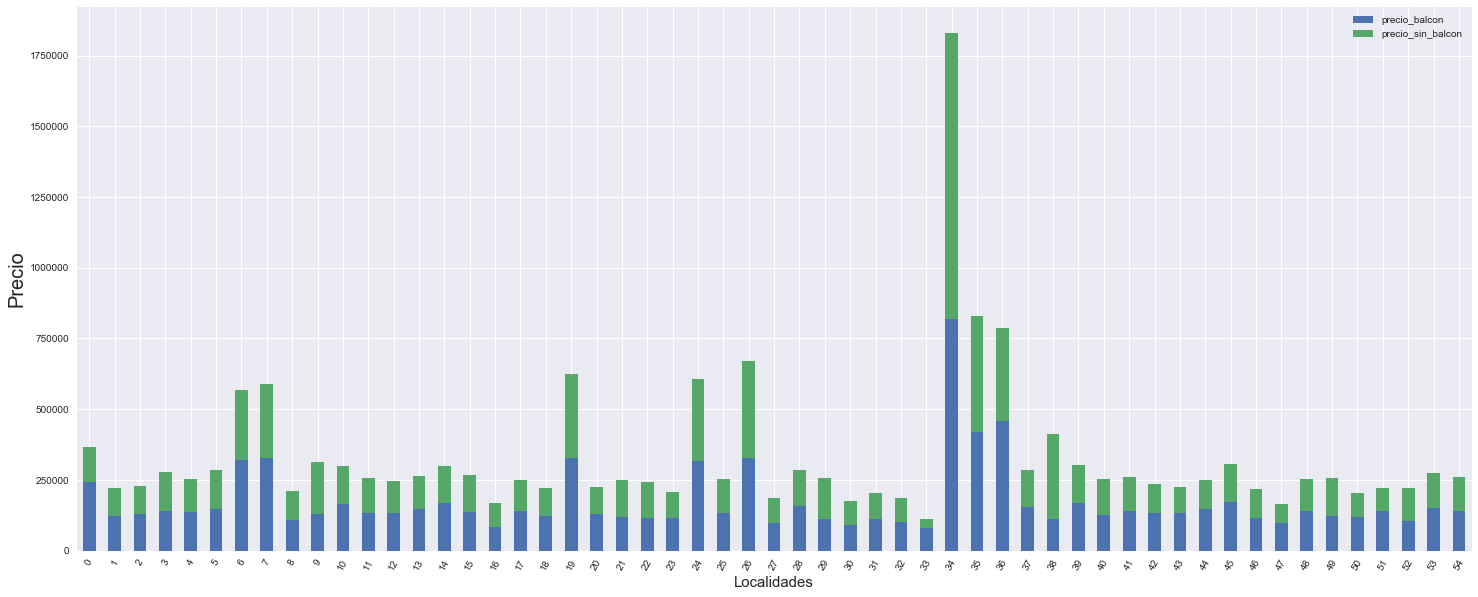

In [139]:
promedioApartmentFiltered = promedioApartment[['localidad', 'precio']].rename(columns={'precio':'precio_balcon'})
promedioApartmentSinBalconFiltered = promedioApartmentSinBalcon[['localidad', 'precio']].rename(columns={'precio':'precio_sin_balcon'})



preciosApartment = pd.merge(promedioApartmentFiltered,promedioApartmentSinBalconFiltered, on='localidad')
preciosApartment.plot(kind="bar", stacked=True , rot=60, figsize=(25,10))

plt.xlabel('Localidades', fontsize=15);
plt.ylabel('Precio', fontsize=20);



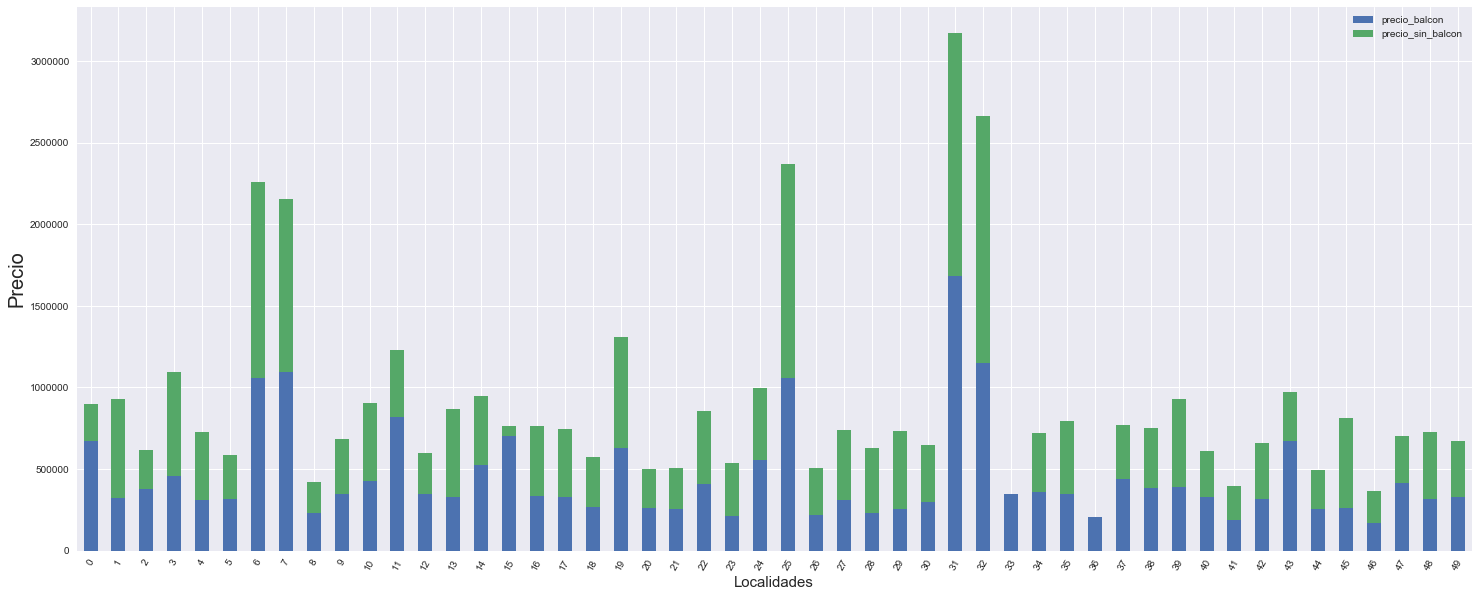

In [141]:
promedioHouseFiltered = promedioHouse[['localidad', 'precio']].rename(columns={'precio':'precio_balcon'})
promedioHouseSinBalconFiltered = promedioHouseSinBalcon[['localidad', 'precio']].rename(columns={'precio':'precio_sin_balcon'})



preciosHouse = pd.merge(promedioHouseFiltered,promedioHouseSinBalconFiltered, on='localidad')
preciosHouse.plot(kind="bar", stacked=True , rot=60, figsize=(25,10))

plt.xlabel('Localidades', fontsize=15);
plt.ylabel('Precio', fontsize=20);


# Expensas

In [39]:
#Precio promedio expensas por zona
expensas = datosCapital.loc[datosCapital.localidad != '',:]
expensas = expensas.loc[expensas.expensas != '', :].loc[expensas.expensas.notnull(),:]
expensas.expensas = expensas.expensas.str.extract('(\d+)').astype(float)
expensas.expensas = pd.to_numeric(expensas.expensas)

expensasPorZona =  expensas.groupby(['localidad', 'tipo_propiedad']).mean()
expensasPorZona = expensasPorZona[['expensas', 'precio']].reset_index()
expensasPorZona.sort_values('expensas', ascending=False).head(10)

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.


,localidad,tipo_propiedad,expensas,precio
104,Puerto Madero,apartment,3073.708333,704533.673684
63,Las Cañitas,apartment,2058.392857,348198.441986
17,Barrio Norte,apartment,1692.731602,291582.751032
110,Retiro,apartment,1566.650000,283836.021505
21,Belgrano,apartment,1560.931777,319714.037286
107,Recoleta,apartment,1421.610294,346883.897958
87,Palermo,apartment,1418.322667,299597.736078
127,Tribunales,apartment,1183.071429,141295.833333
79,Nuñez,apartment,1098.317647,306428.968906
95,Parque Chacabuco,apartment,900.000000,129986.206897


In [40]:
expensasApartment= expensasPorZona[expensasPorZona['tipo_propiedad'] == 'apartment']
expensasApartment.sort_values('expensas', ascending=False).head(10)

,localidad,tipo_propiedad,expensas,precio
104,Puerto Madero,apartment,3073.708333,704533.673684
63,Las Cañitas,apartment,2058.392857,348198.441986
17,Barrio Norte,apartment,1692.731602,291582.751032
110,Retiro,apartment,1566.650000,283836.021505
21,Belgrano,apartment,1560.931777,319714.037286
107,Recoleta,apartment,1421.610294,346883.897958
87,Palermo,apartment,1418.322667,299597.736078
127,Tribunales,apartment,1183.071429,141295.833333
79,Nuñez,apartment,1098.317647,306428.968906
95,Parque Chacabuco,apartment,900.000000,129986.206897


In [41]:
expensasHouse= expensasPorZona[expensasPorZona['tipo_propiedad'] == 'house']
expensasHouse.sort_values('expensas', ascending=False).head(10)


,localidad,tipo_propiedad,expensas,precio
2,Abasto,house,NaN,159000.000000
7,Almagro,house,NaN,274333.333333
11,Balvanera,house,NaN,274666.666667
18,Barrio Norte,house,NaN,590000.000000
22,Belgrano,house,NaN,841083.500000
29,Boedo,house,NaN,253000.000000
33,Caballito,house,NaN,890000.000000
43,Coghlan,house,NaN,650000.000000
50,Congreso,house,NaN,220000.000000
57,Flores,house,NaN,257276.346667


In [42]:

expensasPH= expensasPorZona[expensasPorZona['tipo_propiedad'] == 'PH']
expensasPH.sort_values('expensas', ascending=False).head(10)


,localidad,tipo_propiedad,expensas,precio
0,Abasto,PH,NaN,108600.000000
5,Almagro,PH,NaN,135972.093023
9,Balvanera,PH,NaN,145210.526316
13,Barracas,PH,NaN,141333.333333
16,Barrio Norte,PH,NaN,147538.461538
20,Belgrano,PH,NaN,209964.285714
24,Boca,PH,NaN,85833.333333
27,Boedo,PH,NaN,141000.000000
31,Caballito,PH,NaN,153850.000000
35,Centro / Microcentro,PH,NaN,161666.666667


In [43]:
expensasStore= expensasPorZona[expensasPorZona['tipo_propiedad'] == 'store']
expensasStore.sort_values('expensas', ascending=False).head(10)

,localidad,tipo_propiedad,expensas,precio
3,Abasto,store,NaN,2.390000e+05
8,Almagro,store,NaN,2.683138e+05
12,Balvanera,store,NaN,4.127500e+05
15,Barracas,store,NaN,3.550000e+05
19,Barrio Norte,store,NaN,2.994730e+05
23,Belgrano,store,NaN,3.388333e+05
26,Boca,store,NaN,8.000000e+06
30,Boedo,store,NaN,1.200000e+05
34,Caballito,store,NaN,1.510000e+05
37,Centro / Microcentro,store,NaN,5.300000e+05


# Habitaciones

In [44]:
#Hay además de departamentos, hoteles. 
#Habría que filtrar todo aquello que NO sea hoteles, o bien, tratarlos como categoría aparte. 

datosCapitalByRooms = datosCapital[datosCapital['habitaciones'] < 7]
datosCapitalByRooms = datosCapital[pd.isnull(datosCapital['habitaciones']) != True]

datosCapitalByRoomsGP = datosCapitalByRooms.groupby(['localidad','tipo_propiedad']).mean()
datosCapitalByRoomsGPFiltered = datosCapitalByRoomsGP[['habitaciones','precio']].reset_index()
#datosCapitalByRoomsGPFiltered.sort_values('price', ascending=False).head(10)

In [45]:
promedioRoomsAparment = datosCapitalByRoomsGPFiltered[datosCapitalByRoomsGPFiltered['tipo_propiedad'] == 'apartment']
promedioRoomsAparment.sort_values('habitaciones', ascending=False).head(10)

,localidad,tipo_propiedad,habitaciones,precio
43,Catalinas,apartment,5.000000,590000.000000
199,Villa Soldati,apartment,3.565217,55040.401739
134,Recoleta,apartment,3.471749,400813.798646
138,Retiro,apartment,3.354599,363824.948234
24,Barrio Norte,apartment,3.049325,285687.529065
194,Villa Riachuelo,apartment,3.000000,85000.000000
130,Puerto Madero,apartment,2.913428,786198.016372
99,Once,apartment,2.903704,126058.677519
177,Villa Lugano,apartment,2.838527,73095.449773
67,Distrito de las Artes,apartment,2.700000,120094.085500


In [46]:
promedioRoomsHouse = datosCapitalByRoomsGPFiltered[datosCapitalByRoomsGPFiltered['tipo_propiedad'] == 'house']
promedioRoomsHouse.sort_values('habitaciones', ascending=False).head(10)

,localidad,tipo_propiedad,habitaciones,precio
154,San Telmo,house,8.200000,7.893333e+05
100,Once,house,7.333333,2.716667e+05
139,Retiro,house,7.000000,2.500000e+06
89,Monserrat,house,5.888889,4.414222e+05
66,Constitución,house,5.800000,2.930000e+05
131,Puerto Madero,house,5.750000,7.175000e+05
33,Boca,house,5.482759,2.219655e+05
146,San Cristobal,house,5.468750,3.008781e+05
10,Agronomía,house,5.000000,3.381818e+05
128,Pompeya,house,4.962963,2.129259e+05


In [47]:
promedioRoomsPH = datosCapitalByRoomsGPFiltered[datosCapitalByRoomsGPFiltered['tipo_propiedad'] == 'PH']
promedioRoomsPH.sort_values('habitaciones', ascending=False).head(10)

,localidad,tipo_propiedad,habitaciones,precio
129,Puerto Madero,PH,5.000000,203500.000000
44,Centro / Microcentro,PH,4.900000,144700.000000
60,Congreso,PH,4.403509,165456.140351
98,Once,PH,4.250000,157875.000000
152,San Telmo,PH,4.122137,205971.190000
15,Balvanera,PH,3.968153,166018.527962
144,San Cristobal,PH,3.874126,162761.943357
64,Constitución,PH,3.857143,127785.714286
31,Boca,PH,3.777778,132389.709028
11,Almagro,PH,3.752852,185674.274563


In [48]:
promedioRoomsStore = datosCapitalByRoomsGPFiltered[datosCapitalByRoomsGPFiltered['tipo_propiedad'] == 'store']
promedioRoomsStore.sort_values('habitaciones', ascending=False).head(10)

,localidad,tipo_propiedad,habitaciones,precio
186,Villa Ortuzar,store,10.000000,360000.000000
155,San Telmo,store,7.222222,838333.333333
208,Villa del Parque,store,7.000000,760000.000000
47,Centro / Microcentro,store,7.000000,0.000000
125,Paternal,store,5.250000,312500.000000
42,Caballito,store,4.000000,158666.666667
26,Barrio Norte,store,3.900000,717500.000000
34,Boca,store,3.600000,187600.000000
171,Villa Devoto,store,3.500000,257500.000000
38,Boedo,store,3.000000,514400.000000


# Tipos de propiedades en Gran Buenos Aires


In [49]:
datosBUE.head(10)

,fecha,descripcion,piso,lugar,precio,precio_por_m2,tipo_propiedad,habitaciones,superficie_m2,superficie_cubierta_m2,superficie_total_m2,url,expensas,pais,provincia,localidad
4,2012-08-08,NaN,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,110000.00,315.186246,house,4.0,349.0,NaN,NaN,http://www.properati.com.ar/ak_venta_casa_vill...,NaN,Argentina,Bs.As. G.B.A. Zona Norte,General San Martín
7,2012-08-08,NaN,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,99000.00,647.058824,house,NaN,153.0,NaN,NaN,http://www.properati.com.ar/ax_venta_casa_san-...,NaN,Argentina,Bs.As. G.B.A. Zona Norte,General San Martín
13,2012-08-08,NaN,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|,110000.00,1294.117647,apartment,NaN,85.0,NaN,NaN,http://www.properati.com.ar/md_venta_departame...,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre
14,2012-08-08,NaN,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Pilar|,467464.99,1220.535222,house,4.0,383.0,NaN,NaN,http://www.properati.com.ar/rp_venta_casa_pilar__,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Pilar
15,2012-08-08,NaN,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|,300000.00,1176.470588,house,NaN,255.0,NaN,NaN,http://www.properati.com.ar/3vs_venta_casa_tig...,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre
22,2012-08-18,NaN,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|,195000.00,1875.000000,apartment,NaN,104.0,NaN,NaN,http://www.properati.com.ar/cx4_venta_departam...,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre
27,2012-09-08,NaN,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Pilar|,250000.00,1396.648045,house,2.0,179.0,NaN,NaN,http://www.properati.com.ar/js0_venta_casa_pil...,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Pilar
28,2012-09-12,NaN,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|,1100000.00,1864.406780,house,7.0,590.0,NaN,NaN,http://www.properati.com.ar/o7s_venta_casa_tig...,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre
29,2012-09-19,NaN,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Pilar|,320000.00,NaN,house,NaN,NaN,NaN,NaN,http://www.properati.com.ar/u89_venta_casa_pil...,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Pilar
30,2012-09-19,NaN,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Pilar|,148173.68,2116.766857,apartment,3.0,70.0,NaN,NaN,http://www.properati.com.ar/u8a_venta_departam...,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Pilar


In [50]:
datosBUE['total'] = 1
totalDatosPropiedadesBUE = datosBUE.groupby(['tipo_propiedad']).sum()
totalDatosPropiedadesBUE = totalDatosPropiedadesBUE[['total']].reset_index()
#totalDatosCapitalByPlaces = totalDatosCapitalByPlaces.sort_values('total', ascending=False)
totalDatosPropiedadesBUE.sort_values('total', ascending=False).head(5)

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,tipo_propiedad,total
1,apartment,102593
2,house,102110
0,PH,14039
3,store,3393


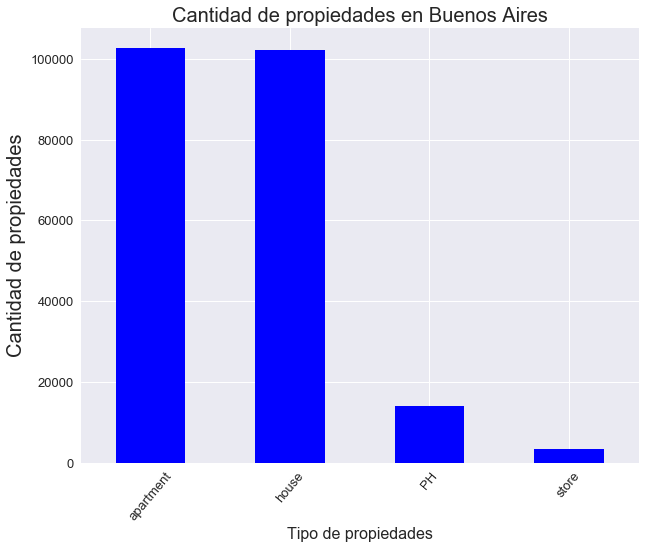

In [51]:
datosBUE['tipo_propiedad'].value_counts().plot(kind='bar', rot=50, figsize=(10,8), color='blue' ,fontsize=13);
plt.title('Cantidad de propiedades en Buenos Aires', fontsize=20);
plt.xlabel('Tipo de propiedades', fontsize=16);
plt.ylabel('Cantidad de propiedades', fontsize=20);

La conclusion es que la distribución de casas y departamento en Buenos Aires es más equitativa con respecto a Capital Federal

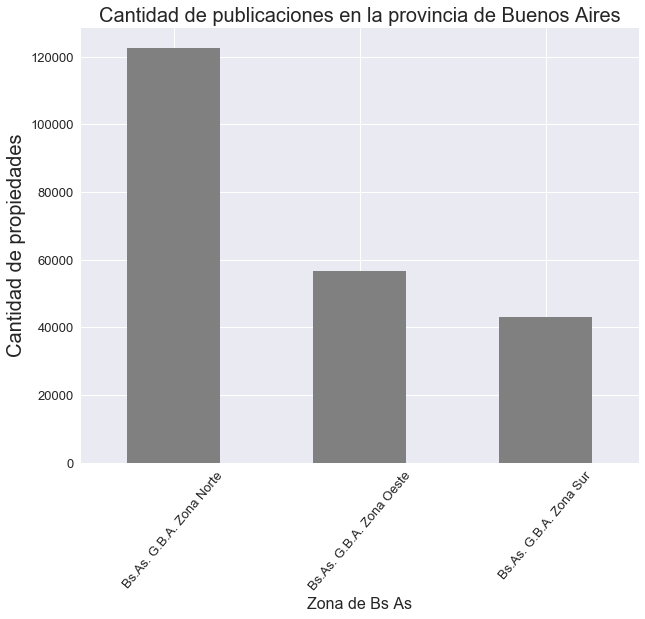

In [52]:
totalPropiedadesBUE_top5 = datosBUE['provincia'].value_counts().sort_values(ascending=False)
totalPropiedadesBUE_top5 = totalPropiedadesBUE_top5.head(5)

totalPropiedadesBUE_top5.plot(kind='bar', rot=50, figsize=(10,8), color='grey' ,fontsize=13);

plt.title('Cantidad de publicaciones en la provincia de Buenos Aires', fontsize=20);
plt.xlabel('Zona de Bs As', fontsize=16);
plt.ylabel('Cantidad de propiedades', fontsize=20);

In [53]:
totalPropiedadesLocBUE_top20 = datosBUE['localidad'].value_counts().sort_values(ascending=False)
totalPropiedadesLocBUE_top20 = totalPropiedadesLocBUE_top20.head(20)

totalPropiedadesLocBUE_top20

Tigre                  36805
La Matanza             19520
Pilar                  18464
Vicente López          17907
Morón                  15060
San Isidro             14401
La Plata               11762
General San Martín      9589
Lanús                   8789
Tres de Febrero         7545
Escobar                 6778
San Fernando            6456
San Miguel              6254
Ituzaingó               5980
Lomas de Zamora         5974
                        4352
Quilmes                 3633
Almirante Brown         3599
Moreno                  3239
Malvinas Argentinas     2430
Name: localidad, dtype: int64

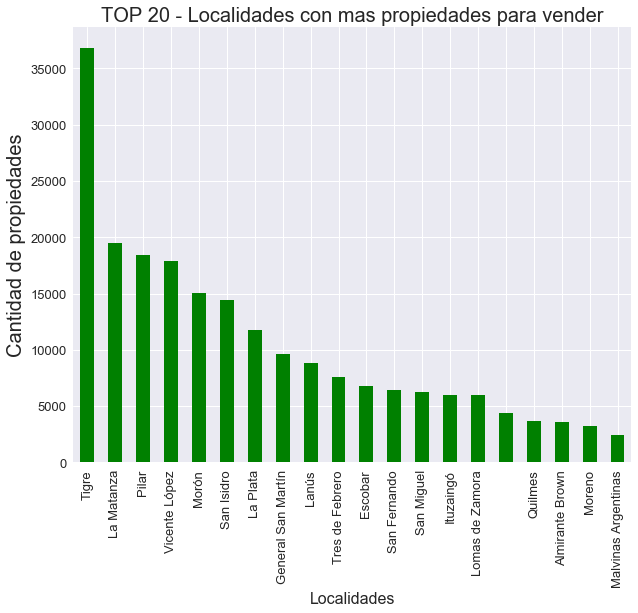

In [54]:
totalPropiedadesLocBUE_top20.plot(kind='bar', rot=90, figsize=(10,8), color='green' ,fontsize=13);

plt.title('TOP 20 - Localidades con mas propiedades para vender', fontsize=20);
plt.xlabel('Localidades', fontsize=16);
plt.ylabel('Cantidad de propiedades', fontsize=20);

Como se ve, la cantidad de ventas en zona norte es ampliamente superior al de zona sur y zona oeste. Entre las seis localidades con más ventas, cuatro corresponde a localidades de zona norte y dos a zona oeste.

In [55]:
datosBUE['total'] = 1
propiedades_BUE_ph  = datosBUE[['localidad','tipo_propiedad', 'total']][datosBUE['tipo_propiedad']=='PH'].groupby('localidad').sum()
propiedades_BUE_ph = propiedades_BUE_ph[['total']].reset_index()
propiedades_BUE_ph.sort_values('total', ascending=False).head(10)

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,localidad,total
9,General San Martín,1974
13,La Matanza,1926
21,Morón,1545
30,Vicente López,1464
15,Lanús,1226
14,La Plata,991
29,Tres de Febrero,937
25,San Isidro,826
24,San Fernando,423
11,Ituzaingó,422


In [56]:
propiedades_BUE_apartment  = datosBUE[['localidad','tipo_propiedad', 'total']][datosBUE['tipo_propiedad']=='apartment'].groupby('localidad').sum()
propiedades_BUE_apartment = propiedades_BUE_apartment[['total']].reset_index()
propiedades_BUE_apartment.sort_values('total', ascending=False).head(10)

,localidad,total
30,Tigre,17479
14,La Matanza,11009
32,Vicente López,10695
23,Pilar,8293
22,Morón,7972
27,San Isidro,6421
15,La Plata,6154
16,Lanús,4542
31,Tres de Febrero,4433
26,San Fernando,4083


In [57]:
propiedades_BUE_house  = datosBUE[['localidad','tipo_propiedad', 'total']][datosBUE['tipo_propiedad']=='house'].groupby('localidad').sum()
propiedades_BUE_house = propiedades_BUE_house[['total']].reset_index()
propiedades_BUE_house.sort_values('total', ascending=False).head(10)

,localidad,total
30,Tigre,19112
23,Pilar,9922
27,San Isidro,6769
14,La Matanza,6230
5,Escobar,5898
32,Vicente López,5486
22,Morón,5325
12,Ituzaingó,4672
15,La Plata,4374
10,General San Martín,3358


In [58]:
propiedades_BUE_store  = datosBUE[['localidad','tipo_propiedad', 'total']][datosBUE['tipo_propiedad']=='store'].groupby('localidad').sum()
propiedades_BUE_store = propiedades_BUE_store[['total']].reset_index()
propiedades_BUE_store.sort_values('total', ascending=False).head(10)

,localidad,total
27,San Isidro,385
14,La Matanza,355
17,Lomas de Zamora,303
32,Vicente López,262
15,La Plata,243
16,Lanús,230
22,Morón,218
10,General San Martín,201
23,Pilar,174
30,Tigre,139


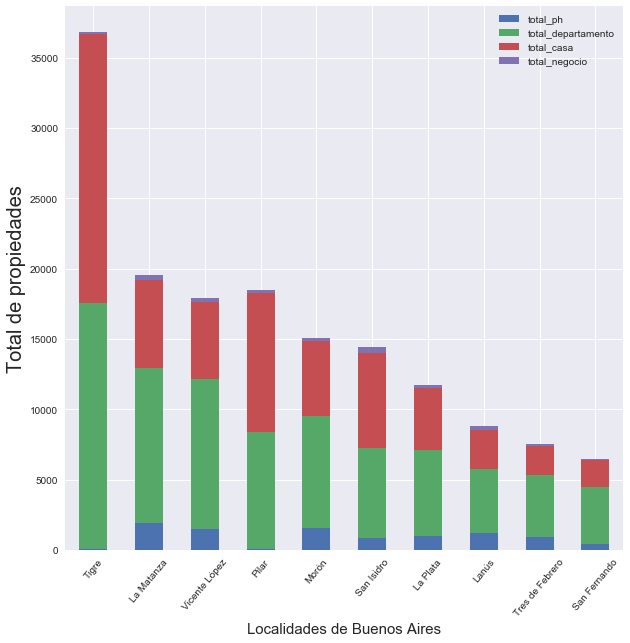

In [59]:
propiedades_BUE_ph  = datosBUE[['localidad','tipo_propiedad']][datosBUE['tipo_propiedad']=='PH'].groupby('localidad').count()
propiedades_BUE_departamento  = datosBUE[['localidad','tipo_propiedad']][datosBUE['tipo_propiedad']=='apartment'].groupby('localidad').count()
propiedades_BUE_casa  = datosBUE[['localidad','tipo_propiedad']][datosBUE['tipo_propiedad']=='house'].groupby('localidad').count()
propiedades_BUE_negocio  = datosBUE[['localidad','tipo_propiedad']][datosBUE['tipo_propiedad']=='store'].groupby('localidad').count()

propiedades_BUE_ph.rename(columns={'tipo_propiedad': 'total_ph'}, inplace=True)
propiedades_BUE_departamento.rename(columns={'tipo_propiedad': 'total_departamento'}, inplace=True)
propiedades_BUE_casa.rename(columns={'tipo_propiedad': 'total_casa'}, inplace=True)
propiedades_BUE_negocio.rename(columns={'tipo_propiedad': 'total_negocio'}, inplace=True)

merge_tipo_prop_x_barrio = pd.merge(pd.merge(pd.merge(propiedades_BUE_ph, propiedades_BUE_departamento,right_index=True, left_index=True),propiedades_BUE_casa,right_index=True, left_index=True), propiedades_BUE_negocio,right_index=True, left_index=True)
merge_tipo_prop_x_barrio_top10 = merge_tipo_prop_x_barrio.sort_values('total_departamento',ascending=False).head(10)

merge_tipo_prop_x_barrio_top10.plot(kind="bar", stacked=True , rot=50, figsize=(10,10))
plt.xlabel('Localidades de Buenos Aires', fontsize=15);
plt.ylabel('Total de propiedades', fontsize=20);

# Varios de precios según fechas

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

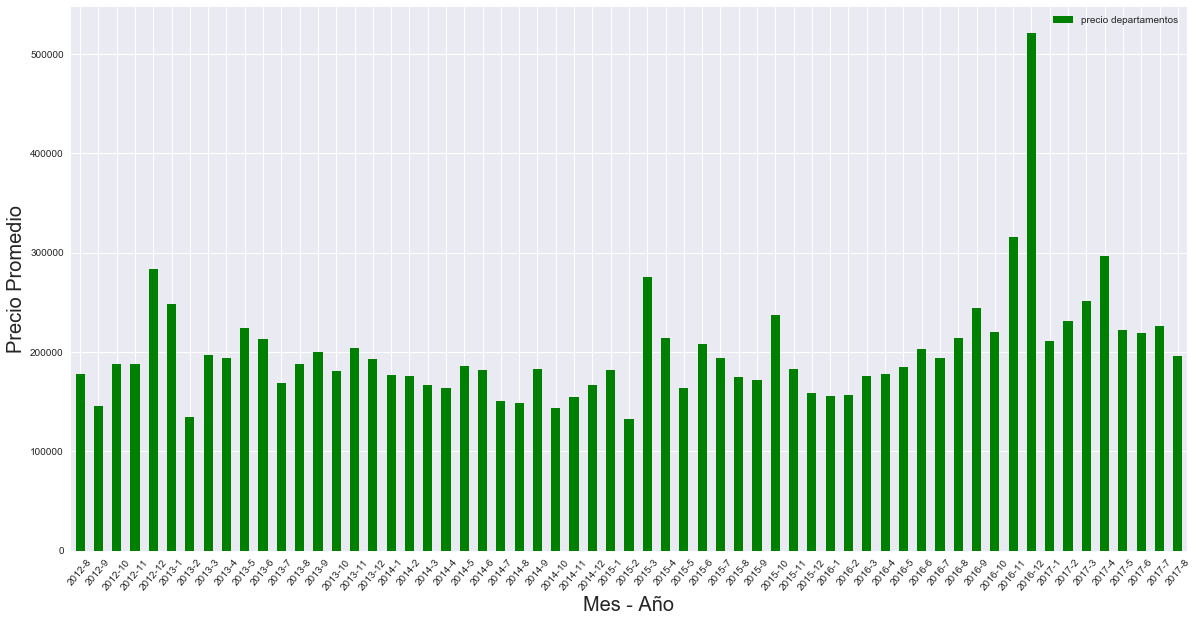

In [60]:
datosCapital['fecha'] = pd.to_datetime(datosCapital['fecha'], errors='coerce')
datosCapital['month'] = datosCapital['fecha'].dt.month
datosCapital['year'] = datosCapital['fecha'].dt.year

datosCapitalByYearMonth = datosCapital.groupby(['year','month','tipo_propiedad']).mean().reset_index()
datosCapitalByYearMonthFiltered = datosCapitalByYearMonth[['year','month','tipo_propiedad','precio']]

apartmentByMonthYear = datosCapitalByYearMonthFiltered[datosCapitalByYearMonth['tipo_propiedad'] == 'apartment']
#apartmentByMonthYear.sort_values(['year','month'], ascending=False)

apartmentByMonthYear['month_year'] =apartmentByMonthYear['year'].astype(str) + '-' + apartmentByMonthYear['month'].astype(str)
graficoApartment = apartmentByMonthYear[['month_year','precio']].set_index('month_year')
graficoApartment.rename(columns={'precio':'precio departamentos'},inplace=True)
graficoApartment.head()
graficoApartment.plot(kind="bar", stacked=True , rot=50, figsize=(20,10), color='green')

plt.xlabel('Mes - Año', fontsize=20);
plt.ylabel('Precio Promedio', fontsize=20);

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


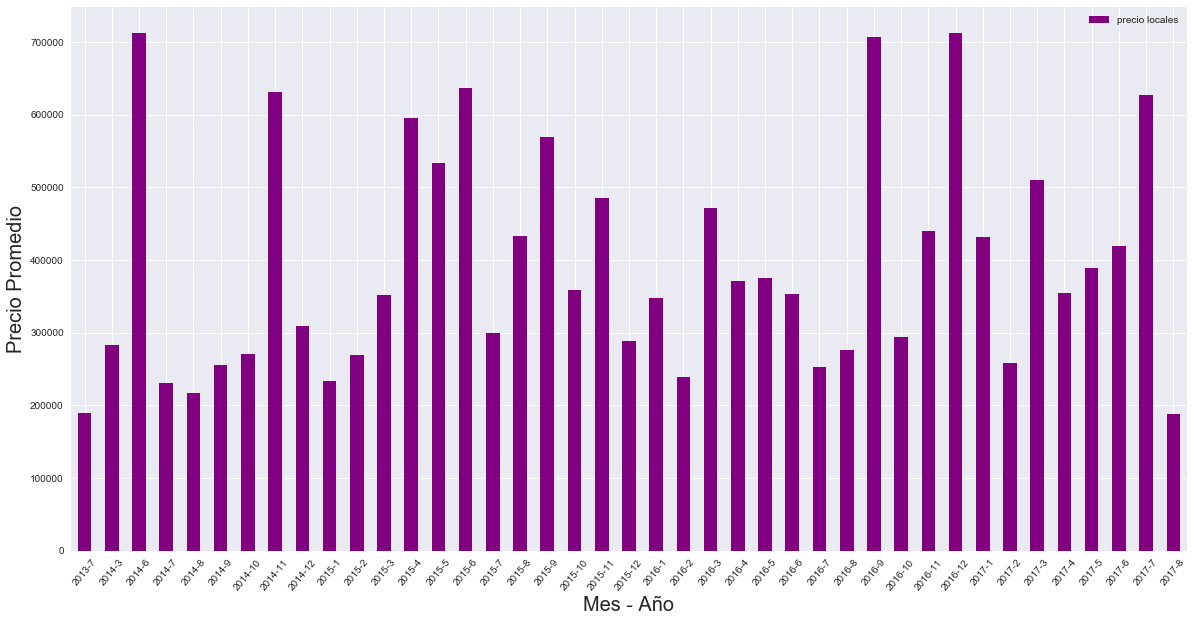

In [61]:
storeByMonthYear = datosCapitalByYearMonthFiltered[datosCapitalByYearMonth['tipo_propiedad'] == 'store']
#storeByMonthYear.sort_values(['year','month'], ascending=False)

storeByMonthYear['month_year'] =storeByMonthYear['year'].astype(str) + '-' + storeByMonthYear['month'].astype(str)
graficoStore = storeByMonthYear[['month_year','precio']].set_index('month_year')
graficoStore.rename(columns={'precio':'precio locales'},inplace=True)
graficoStore.head()
graficoStore.plot(kind="bar", stacked=True , rot=50, figsize=(20,10), color='purple')

plt.xlabel('Mes - Año', fontsize=20);
plt.ylabel('Precio Promedio', fontsize=20);

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


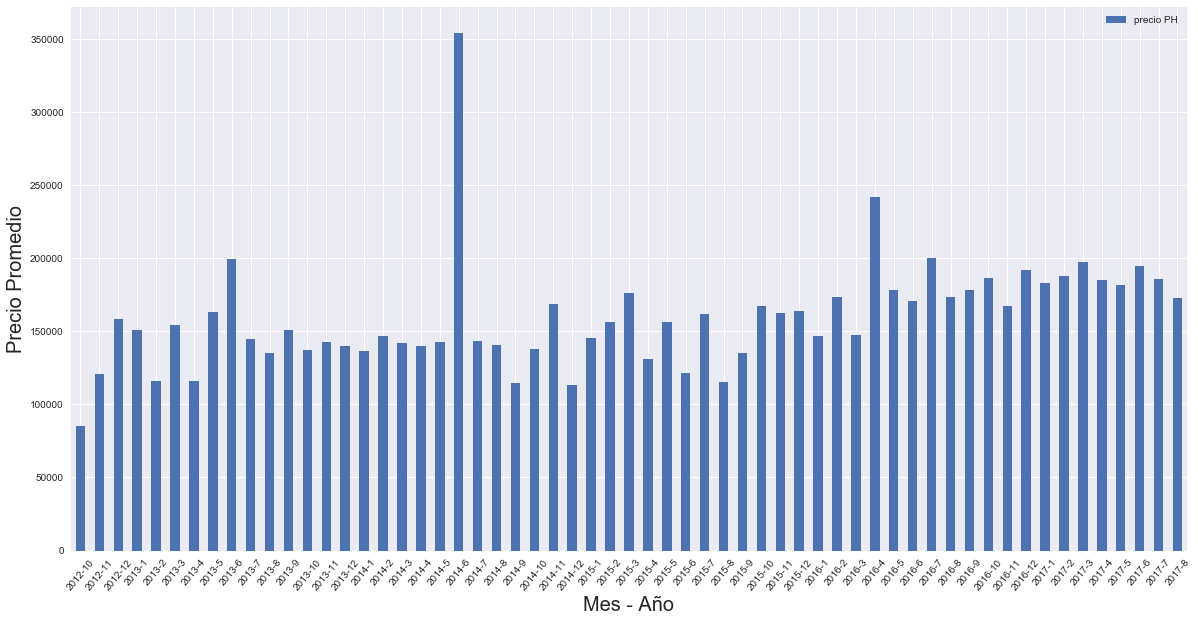

In [62]:
PHByMonthYear = datosCapitalByYearMonthFiltered[datosCapitalByYearMonth['tipo_propiedad'] == 'PH']

PHByMonthYear['month_year'] =PHByMonthYear['year'].astype(str) + '-' + PHByMonthYear['month'].astype(str)
graficoPH = PHByMonthYear[['month_year','precio']].set_index('month_year')
graficoPH.rename(columns={'precio':'precio PH'},inplace=True)

graficoPH.plot(kind="bar", stacked=True , rot=50, figsize=(20,10))

plt.xlabel('Mes - Año', fontsize=20);
plt.ylabel('Precio Promedio', fontsize=20);

#PHByMonthYear.sort_values(['year','month'], ascending=False)

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


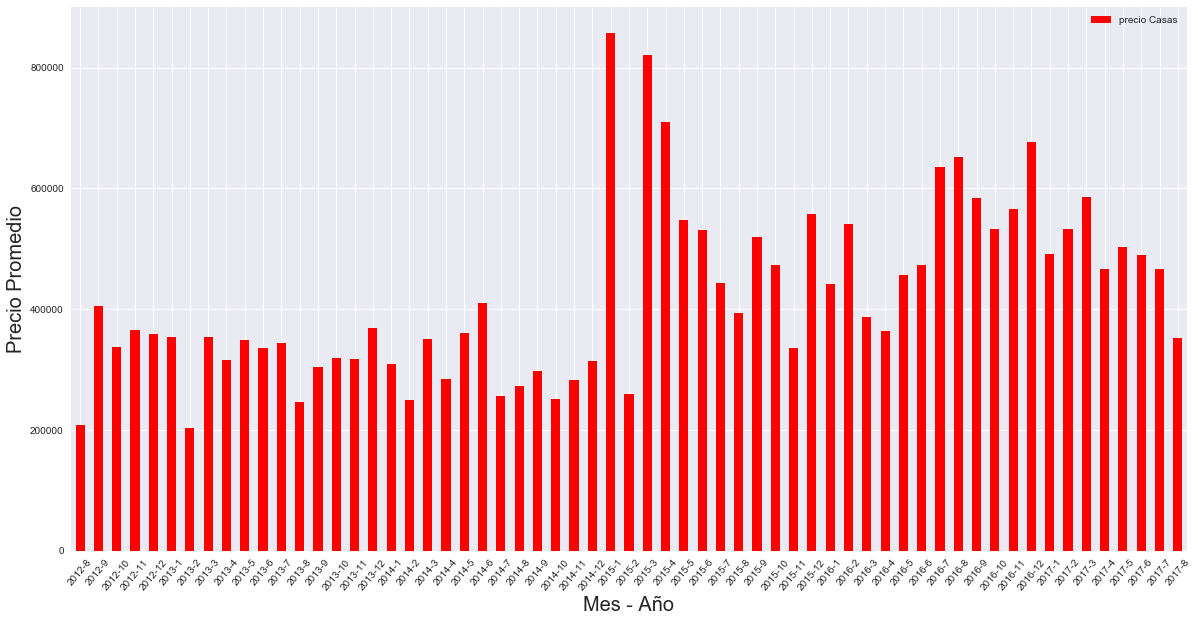

In [63]:
houseByMonthYear = datosCapitalByYearMonthFiltered[datosCapitalByYearMonth['tipo_propiedad'] == 'house']
#houseByMonthYear.sort_values(['year','month'], ascending=False)

houseByMonthYear['month_year'] =houseByMonthYear['year'].astype(str) + '-' + houseByMonthYear['month'].astype(str)
graficoHouse = houseByMonthYear[['month_year','precio']].set_index('month_year')
graficoHouse.rename(columns={'precio':'precio Casas'},inplace=True)

graficoHouse.plot(kind="bar", stacked=True , rot=50, figsize=(20,10), color='red')

plt.xlabel('Mes - Año', fontsize=20);
plt.ylabel('Precio Promedio', fontsize=20);

## Se puede observar que los precios, en general, aumentaron conforme al transcurso del tiempo.

# Cantidades Por Fechas

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


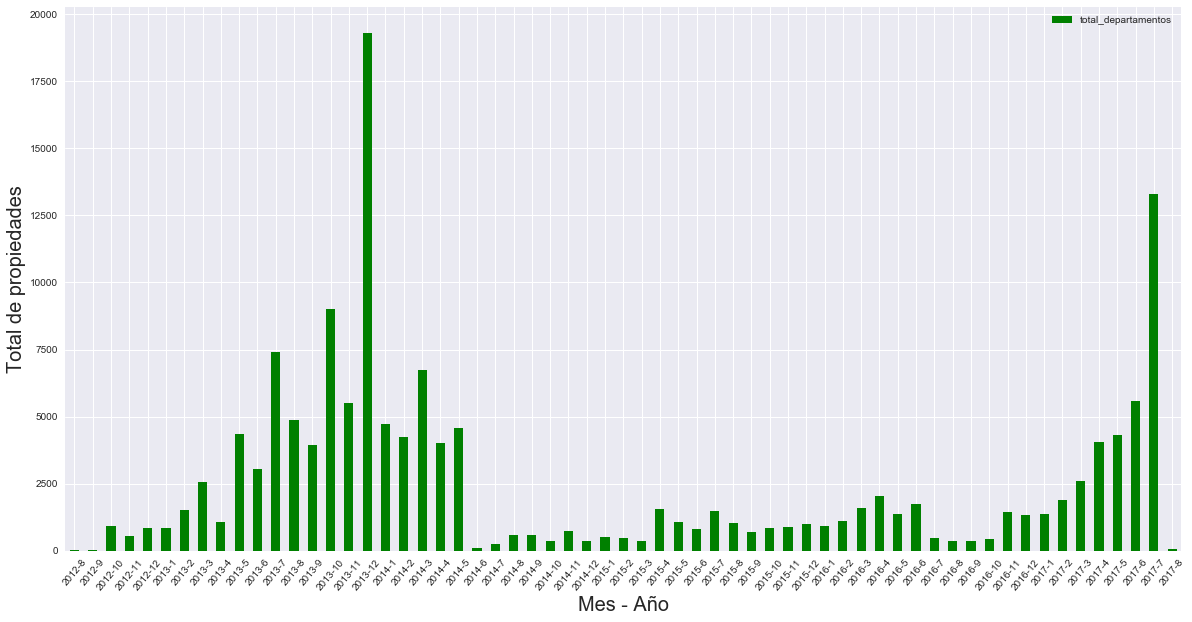

In [64]:
datosCapital['total'] = 1
totalDatosCapitalByYearMonth = datosCapital.groupby(['year','month','tipo_propiedad']).sum().reset_index()
totalDatosCapitalByYearMonthFiltered = totalDatosCapitalByYearMonth[['year','month','tipo_propiedad','total']]

totalApartmentByMonthYear = totalDatosCapitalByYearMonthFiltered[totalDatosCapitalByYearMonthFiltered['tipo_propiedad'] == 'apartment']
#totalApartmentByMonthYear.sort_values(['year','month'], ascending=False)

totalApartmentByMonthYear['month_year'] =totalApartmentByMonthYear['year'].astype(str) + '-' + totalApartmentByMonthYear['month'].astype(str)
graficoApartment = totalApartmentByMonthYear[['month_year','total']].set_index('month_year')
graficoApartment.rename(columns={'total':'total_departamentos'},inplace=True)
graficoApartment.head()
graficoApartment.plot(kind="bar", stacked=True , rot=50, figsize=(20,10), color='green')

plt.xlabel('Mes - Año', fontsize=20);
plt.ylabel('Total de propiedades', fontsize=20);


C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


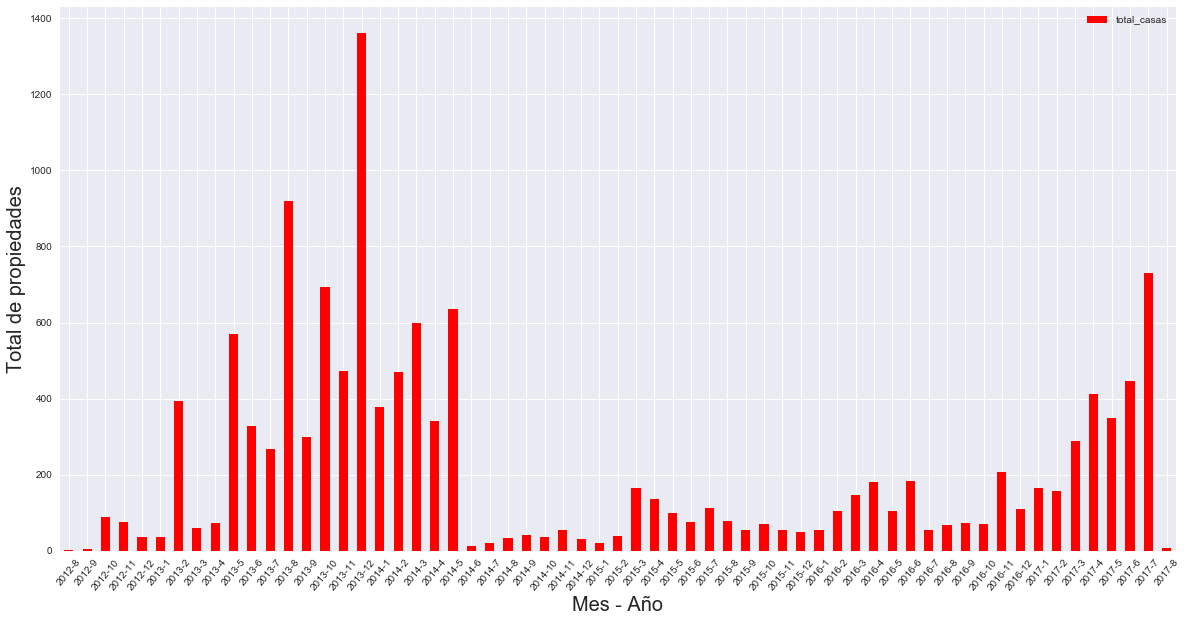

In [65]:
totalHouseByMonthYear = totalDatosCapitalByYearMonthFiltered[totalDatosCapitalByYearMonthFiltered['tipo_propiedad'] == 'house']
#totalHouseByMonthYear.sort_values(['year','month'], ascending=False)

totalHouseByMonthYear['month_year'] =totalHouseByMonthYear['year'].astype(str) + '-' + totalHouseByMonthYear['month'].astype(str)
graficoHouse = totalHouseByMonthYear[['month_year','total']].set_index('month_year')
graficoHouse.rename(columns={'total':'total_casas'},inplace=True)
graficoHouse.head()
graficoHouse.plot(kind="bar", stacked=True , rot=50, figsize=(20,10), color='red')

plt.xlabel('Mes - Año', fontsize=20);
plt.ylabel('Total de propiedades', fontsize=20);

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


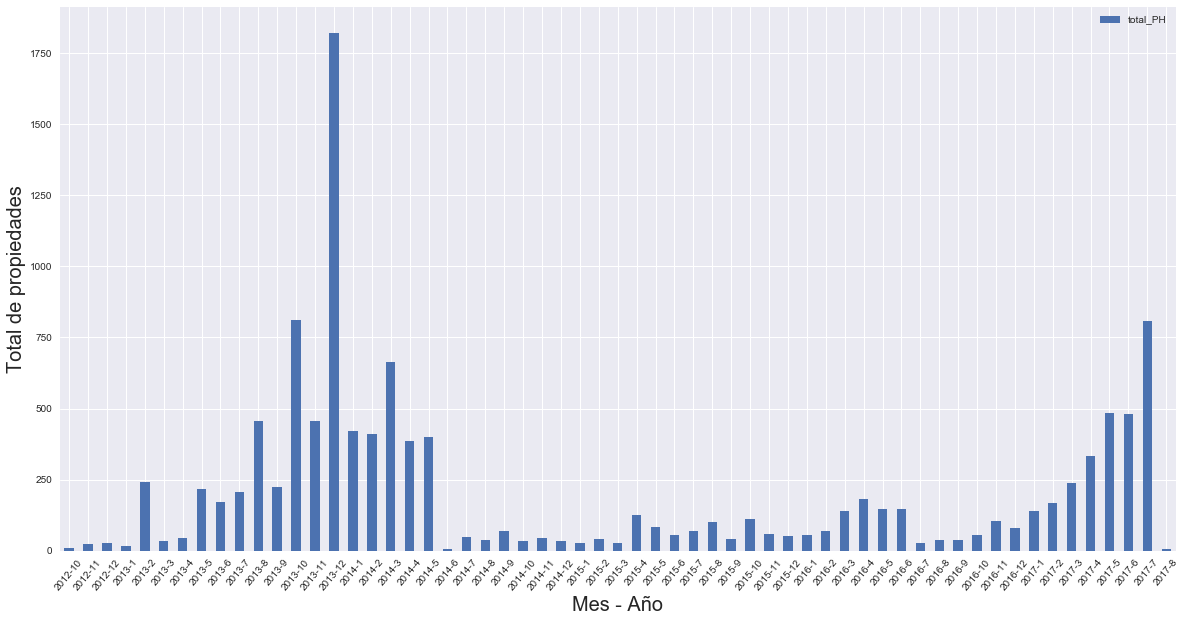

In [66]:
totalPHByMonthYear = totalDatosCapitalByYearMonthFiltered[totalDatosCapitalByYearMonthFiltered['tipo_propiedad'] == 'PH']
#totalPHByMonthYear.sort_values(['year','month'], ascending=False)

totalPHByMonthYear['month_year'] =totalPHByMonthYear['year'].astype(str) + '-' + totalPHByMonthYear['month'].astype(str)
graficoPH = totalPHByMonthYear[['month_year','total']].set_index('month_year')
graficoPH.rename(columns={'total':'total_PH'},inplace=True)
graficoPH.head()
graficoPH.plot(kind="bar", stacked=True , rot=50, figsize=(20,10))

plt.xlabel('Mes - Año', fontsize=20);
plt.ylabel('Total de propiedades', fontsize=20);

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


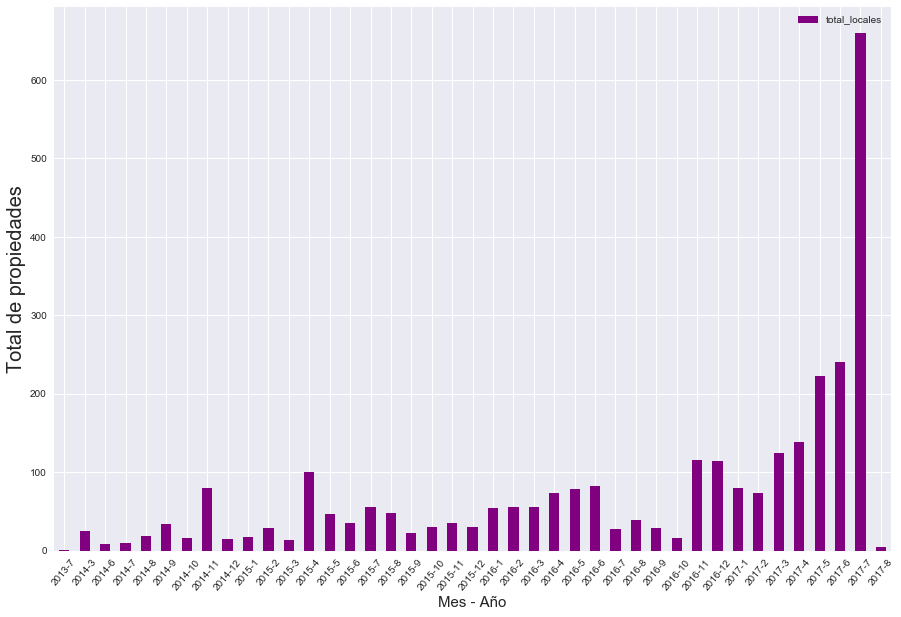

In [67]:
totalStoreByMonthYear = totalDatosCapitalByYearMonthFiltered[totalDatosCapitalByYearMonthFiltered['tipo_propiedad'] == 'store']
#totalStoreByMonthYear.sort_values(['year','month'], ascending=False)
totalStoreByMonthYear['month_year'] =totalStoreByMonthYear['year'].astype(str) + '-' + totalStoreByMonthYear['month'].astype(str)
graficoStore = totalStoreByMonthYear[['month_year','total']].set_index('month_year')
graficoStore.rename(columns={'total':'total_locales'},inplace=True)
graficoStore.head()
graficoStore.plot(kind="bar", stacked=True , rot=50, figsize=(15,10), color='purple')

plt.xlabel('Mes - Año', fontsize=15);
plt.ylabel('Total de propiedades', fontsize=20);